# Project 3: Cars4U 
Student : Cameron Presley

Version : 2021.03.12

email : cameron@ignitedzen.net

Dataset Filename : used_cars_data.csv

# Background, Context, Objective, and Deliverables

Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

Objective

 Explore and visualize the dataset.
 Build a linear regression model to predict the prices of used cars.
 Generate a set of insights and recommendations that will help the business.
Data Dictionary 

 S.No. : Serial Number
 
 Name : Name of the car which includes Brand name and Model name
 
 Location : The location in which the car is being sold or is available for purchase Cities
 
 Year : Manufacturing year of the car
 
 Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
 
 Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
 
 Transmission : The type of transmission used by the car. (Automatic / Manual)
 
 Owner : Type of ownership
 
 Mileage : The standard mileage offered by the car company in kmpl or km/kg
 
 Engine : The displacement volume of the engine in CC.
 
 Power : The maximum power of the engine in bhp.
 
 Seats : The number of seats in the car.
 
 New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
 
 Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# Project Notebook Outline

**please note that the elements from the grading Rubric are not in this order.  I chose to do a large portion of the data-preprocessing first, ahead of EDA, and then follow up with more data cleansing ahead of the Model build and as a part of the model build ***

1. DATA PREPROCESSING

2. EDA: Illustrate insights

3. MODEL BUILD - Linear Regression

4. TEST ASSUMPTIONS - LR Model

5. MODEL PERFORMANCE Eval

6. ACTIONABLE INSIGHTS - RECOMMENDATIONS




# Build header + import necessary libraries : numpy, pandas, seaborn, matplotlib.pyplot, etc., read in the dataset, set some styling

In [1]:
#Build a basic program header

student = 'Cameron Presley'
version = '2021.03.12'
email = 'cameron@ignitedzen.net'
title =  'Project 3:  Cars4U'
dataset_filename = 'used_cars_data.csv'

print ('Project Title :', title)
print ('')
print ('Student :', student)
print ('')
print ('Version :', version)
print ('')
print ('email :', email)
print ('')
print ('Dataset Filename :', dataset_filename)
print ('')



#!pip3 install impyute
#if I decide to use the IMPYUTE KNN library for missing value imputation, I will need to install this library

#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np #working with arrays and applying linear algebra
import pandas as pd #needed for data analysis and dealing with data sets in general
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
import scipy.stats as stats #needed for statistical anlaysis
import statsmodels.api as sm #needed for building a contingency table from a Dataframe
from statsmodels.stats.proportion import proportions_ztest # for proportion Z test
from statsmodels.formula.api import ols # for ANOVA
from statsmodels.stats.anova import anova_lm # for ANOVA
from scipy.stats import chi2_contingency # for CHI SQUARE
from scipy.stats import ttest_rel #paired T-test
from scipy.stats import levene #Levene's test
import math #needed for some math functions such as sqrt
from sklearn.preprocessing import OneHotEncoder #load in case I need to one-hot encode
#import sys #will potentially use this for KNN missing data imputation...placeholder for now
#from impyute.imputation.cs import fast_knn
#sys.setrecursionlimit(100000) #Increase the recursion limit of the OS


# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

#use seaborn styling - white grid

sns.set_style("whitegrid")


#Load Customer Data and check the basic struture ( the shape - rows + columns)

data = pd.read_csv('used_cars_data.csv')


# we should always protect the original data, so assigning the data to another variable to prevent changes to the original data set


df = data.copy()

#Determine the basic shape of the data - # of rows and # of cols

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

Project Title : Project 3:  Cars4U

Student : Cameron Presley

Version : 2021.03.12

email : cameron@ignitedzen.net

Dataset Filename : used_cars_data.csv

There are 7253 rows and 14 columns.


# Initial Data Review

In [2]:
#open up view of columns and increase view of row data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#set a seed value to get the same results with each random sampling of the table

np.random.seed(20)
df.sample(n=15)

S.No.                                Name    Location  Year  \
1554   1554                     Maruti Ritz VXI   Hyderabad  2012   
321     321                Honda Accord 2.4 A/T      Mumbai  2011   
4019   4019         Hyundai i20 Sportz 1.4 CRDi      Jaipur  2013   
6535   6535                     Maruti Ritz ZXi      Mumbai  2015   
2814   2814              Maruti Swift Dzire VXi      Mumbai  2009   
521     521  Land Rover Range Rover HSE Dynamic  Coimbatore  2017   
1227   1227        BMW 3 Series 328i Sport Line        Pune  2013   
6193   6193     Skoda Laura 1.9 TDI MT Elegance        Pune  2007   
1533   1533           Hyundai Verna 1.6 SX VTVT        Pune  2014   
4300   4300              Maruti Wagon R VXI AMT      Mumbai  2018   
3840   3840                    Maruti Dzire New        Pune  2016   
3933   3933                       Volvo XC60 D5   Hyderabad  2015   
2973   2973                Volvo S60 D4 KINETIC       Delhi  2014   
2810   2810         Maruti Wagon R LXI Optional     Kolkata  2016   
6506   6506                  Hyundai Accent GLE     Kolkata  2009   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
1554              68776    Petrol       Manual      First   21.1 kmpl   
321               60000    Petrol    Automatic      First   11.7 kmpl   
4019              70933    Diesel       Manual     Second   21.9 kmpl   
6535              10500    Petrol       Manual     Second   18.5 kmpl   
2814              54540    Petrol       Manual      Third   17.5 kmpl   
521               49275    Diesel    Automatic      First   12.7 kmpl   
1227              49000    Petrol    Automatic      First  14.59 kmpl   
6193             124298    Diesel       Manual     Second   17.0 kmpl   
1533              48000    Petrol       Manual     Second  17.01 kmpl   
4300               1997    Petrol    Automatic      First   22.5 kmpl   
3840              30500    Diesel    Automatic      First  26.59 kmpl   
3933             100000    Diesel    Automatic      First   13.5 kmpl   
2973              48000    Diesel    Automatic     Second    9.0 kmpl   
2810               4800    Petrol       Manual      First  20.51 kmpl   
6506              46000    Petrol       Manual      First   13.2 kmpl   

       Engine      Power  Seats  New_Price  Price  
1554  1197 CC  85.80 bhp    5.0        NaN   3.90  
321   2354 CC  177.6 bhp    5.0        NaN   4.45  
4019  1396 CC  88.76 bhp    5.0        NaN   3.90  
6535  1197 CC  85.80 bhp    5.0        NaN    NaN  
2814  1298 CC   85.8 bhp    5.0        NaN   2.65  
521   2179 CC  187.7 bhp    5.0        NaN  45.64  
1227  1997 CC    245 bhp    5.0        NaN  19.00  
6193  1896 CC    105 bhp    5.0        NaN    NaN  
1533  1591 CC  121.3 bhp    5.0        NaN   5.20  
4300   998 CC     67 bhp    5.0  6.14 Lakh   4.45  
3840  1248 CC     74 bhp    5.0        NaN   7.65  
3933  2400 CC    215 bhp    5.0        NaN  32.50  
2973  1984 CC    181 bhp    5.0        NaN  16.00  
2810   998 CC  67.04 bhp    5.0        NaN   3.60  
6506  1495 CC     94 bhp    5.0        NaN    NaN

# early insights on data set....
    
1.  Mileage has units, Engine and Power have units (are they the same, if not fix)...and then need to remove.  Will remove later in the process.

2.  Kilometers driven is a on significantly different scale than the other data.  So we will most likely need to address that later.

3.  If we keep New_Price, there are some Null Values we will need to address.  Same for Price.  So the level of missingness needs to be explored further and underst

4.  Serial number matches the Row Index....so look to drop.  



# Explore UNITS on Mileage, Engine, Power to see if we have mismatches that need to be addressed

In [3]:
grouped_Mileage=df.groupby('Mileage')
grouped_Mileage.head(10)


S.No.                                Name    Location  Year  \
0         0              Maruti Wagon R LXI CNG      Mumbai  2010   
1         1    Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2         2                        Honda Jazz V     Chennai  2011   
3         3                   Maruti Ertiga VDI     Chennai  2012   
4         4     Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...     ...                                 ...         ...   ...   
7214   7214           Hyundai i20 Active 1.4 SX       Delhi  2017   
7219   7219         Ford Fiesta 1.4 Duratec EXI  Coimbatore  2009   
7224   7224                  Datsun GO T Petrol     Chennai  2016   
7228   7228  Tata Tiago 1.05 Revotorq XT Option        Pune  2016   
7244   7244               Chevrolet Aveo 1.4 LS        Pune  2009   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       CNG       Manual      First  26.6 km/kg   
1                 41000    Diesel       Manual      First  19.67 kmpl   
2                 46000    Petrol       Manual      First   18.2 kmpl   
3                 87000    Diesel       Manual      First  20.77 kmpl   
4                 40670    Diesel    Automatic     Second   15.2 kmpl   
...                 ...       ...          ...        ...         ...   
7214              14301    Diesel       Manual      First  21.19 kmpl   
7219              44702    Petrol       Manual      First   16.6 kmpl   
7224              36000    Petrol       Manual      First  19.83 kmpl   
7228              41413    Diesel       Manual      First  27.28 kmpl   
7244              45463    Petrol       Manual      First  14.49 kmpl   

       Engine      Power  Seats  New_Price  Price  
0      998 CC  58.16 bhp    5.0        NaN   1.75  
1     1582 CC  126.2 bhp    5.0        NaN  12.50  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3     1248 CC  88.76 bhp    7.0        NaN   6.00  
4     1968 CC  140.8 bhp    5.0        NaN  17.74  
...       ...        ...    ...        ...    ...  
7214  1396 CC  88.73 bhp    5.0        NaN    NaN  
7219  1388 CC     68 bhp    5.0        NaN    NaN  
7224  1198 CC     67 bhp    5.0  5.53 Lakh    NaN  
7228  1047 CC     69 bhp    5.0  7.06 Lakh    NaN  
7244  1399 CC   92.7 bhp    5.0        NaN    NaN  

[2840 rows x 14 columns]

In [4]:
grouped_Power=df.groupby('Power')
grouped_Power.head(10)

S.No.                                       Name    Location  Year  \
0         0                     Maruti Wagon R LXI CNG      Mumbai  2010   
1         1           Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2         2                               Honda Jazz V     Chennai  2011   
3         3                          Maruti Ertiga VDI     Chennai  2012   
4         4            Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...     ...                                        ...         ...   ...   
7205   7205  Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2015   
7225   7225               Skoda Superb Petrol Ambition       Delhi  2010   
7231   7231          Ford EcoSport 1.5 Petrol Ambiente       Kochi  2017   
7232   7232                     Jeep Compass 1.4 Sport      Mumbai  2018   
7244   7244                      Chevrolet Aveo 1.4 LS        Pune  2009   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       CNG       Manual      First  26.6 km/kg   
1                 41000    Diesel       Manual      First  19.67 kmpl   
2                 46000    Petrol       Manual      First   18.2 kmpl   
3                 87000    Diesel       Manual      First  20.77 kmpl   
4                 40670    Diesel    Automatic     Second   15.2 kmpl   
...                 ...       ...          ...        ...         ...   
7205              43020    Diesel    Automatic      First   13.0 kmpl   
7225              40000    Petrol       Manual      First   13.1 kmpl   
7231              39015    Petrol       Manual      First   17.0 kmpl   
7232               6000    Petrol       Manual      First   16.0 kmpl   
7244              45463    Petrol       Manual      First  14.49 kmpl   

       Engine       Power  Seats   New_Price  Price  
0      998 CC   58.16 bhp    5.0         NaN   1.75  
1     1582 CC   126.2 bhp    5.0         NaN  12.50  
2     1199 CC    88.7 bhp    5.0   8.61 Lakh   4.50  
3     1248 CC   88.76 bhp    7.0         NaN   6.00  
4     1968 CC   140.8 bhp    5.0         NaN  17.74  
...       ...         ...    ...         ...    ...  
7205  2143 CC   201.1 bhp    5.0         NaN    NaN  
7225  1798 CC   157.8 bhp    5.0         NaN    NaN  
7231  1497 CC  121.36 bhp    5.0   8.79 Lakh    NaN  
7232  1368 CC     160 bhp    5.0  18.16 Lakh    NaN  
7244  1399 CC    92.7 bhp    5.0         NaN    NaN  

[2338 rows x 14 columns]

In [5]:
grouped_Engine=df.groupby('Engine')
grouped_Engine.head(10)

S.No.                                Name    Location  Year  \
0         0              Maruti Wagon R LXI CNG      Mumbai  2010   
1         1    Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2         2                        Honda Jazz V     Chennai  2011   
3         3                   Maruti Ertiga VDI     Chennai  2012   
4         4     Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...     ...                                 ...         ...   ...   
7067   7067                    OpelCorsa 1.4Gsi   Hyderabad  2005   
7122   7122               Hyundai Elantra SX AT   Bangalore  2016   
7156   7156             BMW 7 Series 740i Sedan       Kochi  2013   
7186   7186           Maruti Baleno Vxi - BSIII        Pune  2004   
7228   7228  Tata Tiago 1.05 Revotorq XT Option        Pune  2016   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       CNG       Manual      First  26.6 km/kg   
1                 41000    Diesel       Manual      First  19.67 kmpl   
2                 46000    Petrol       Manual      First   18.2 kmpl   
3                 87000    Diesel       Manual      First  20.77 kmpl   
4                 40670    Diesel    Automatic     Second   15.2 kmpl   
...                 ...       ...          ...        ...         ...   
7067              50000    Petrol       Manual     Second   14.2 kmpl   
7122              25000    Petrol    Automatic     Second   14.5 kmpl   
7156              86107    Petrol    Automatic      First   8.45 kmpl   
7186              43000    Petrol       Manual     Second   15.4 kmpl   
7228              41413    Diesel       Manual      First  27.28 kmpl   

       Engine      Power  Seats  New_Price  Price  
0      998 CC  58.16 bhp    5.0        NaN   1.75  
1     1582 CC  126.2 bhp    5.0        NaN  12.50  
2     1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3     1248 CC  88.76 bhp    7.0        NaN   6.00  
4     1968 CC  140.8 bhp    5.0        NaN  17.74  
...       ...        ...    ...        ...    ...  
7067  1389 CC     88 bhp    5.0        NaN    NaN  
7122  1797 CC  147.4 bhp    5.0        NaN    NaN  
7156  2979 CC    321 bhp    5.0        NaN    NaN  
7186  1590 CC     94 bhp    5.0        NaN    NaN  
7228  1047 CC     69 bhp    5.0  7.06 Lakh    NaN  

[1014 rows x 14 columns]

# 1.  Data-preprocessing

# .....First glance observations....

1.  Taking a look at the general structure and for areas that could be problems.  e.g., Column headers appear to be OK (was mainly concerned with spaces if there were any).

1.  Numerical values in the data that have units of measure.  I ultimately want to remove these units of measure to clean the data, but before I do, I need to make sure they are all the same.  If they aren't the same, I may need to convert them to the same units of measure and then I will drop the Units and make them numerical values (i.e., Int64 or Float64 depending on what is most appropriate).

2. We can see that the values for Mileage are showing up in km/kg and kmpl.  However, if we assume that 1kg of fuel is equal to 1L of fluid, then the units are the same and we can move forward without finding the specific differences and standardizing them to the same units.  Note that 1Kg of H20 = 1 L of H20.  While fuel may have a slightly different conversion, given that it is an non-compressible fluid and approximately the same density as water...the assumption is safe for our analysis.  we can move forward later and strip the units without conversion for Mileage, Power, and Engine.


3.  Name is super complex....appears however to be structure as Make, Model, and then Other Classifier...will consider this when processing the data and considering complexity for model building.



# Looking at the basic shape of the data.... and other opportunities to clean.

In [6]:
df.describe (include ='all')


S.No.                    Name Location         Year  \
count   7253.000000                    7253     7253  7253.000000   
unique          NaN                    2041       11          NaN   
top             NaN  Mahindra XUV500 W8 2WD   Mumbai          NaN   
freq            NaN                      55      949          NaN   
mean    3626.000000                     NaN      NaN  2013.365366   
std     2093.905084                     NaN      NaN     3.254421   
min        0.000000                     NaN      NaN  1996.000000   
25%     1813.000000                     NaN      NaN  2011.000000   
50%     3626.000000                     NaN      NaN  2014.000000   
75%     5439.000000                     NaN      NaN  2016.000000   
max     7252.000000                     NaN      NaN  2019.000000   

        Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage  \
count        7.253000e+03      7253         7253       7253       7251   
unique                NaN         5            2          4        450   
top                   NaN    Diesel       Manual      First  17.0 kmpl   
freq                  NaN      3852         5204       5952        207   
mean         5.869906e+04       NaN          NaN        NaN        NaN   
std          8.442772e+04       NaN          NaN        NaN        NaN   
min          1.710000e+02       NaN          NaN        NaN        NaN   
25%          3.400000e+04       NaN          NaN        NaN        NaN   
50%          5.341600e+04       NaN          NaN        NaN        NaN   
75%          7.300000e+04       NaN          NaN        NaN        NaN   
max          6.500000e+06       NaN          NaN        NaN        NaN   

         Engine   Power        Seats   New_Price        Price  
count      7207    7207  7200.000000        1006  6019.000000  
unique      150     386          NaN         625          NaN  
top     1197 CC  74 bhp          NaN  33.36 Lakh          NaN  
freq        732     280          NaN           6          NaN  
mean        NaN     NaN     5.279722         NaN     9.479468  
std         NaN     NaN     0.811660         NaN    11.187917  
min         NaN     NaN     0.000000         NaN     0.440000  
25%         NaN     NaN     5.000000         NaN     3.500000  
50%         NaN     NaN     5.000000         NaN     5.640000  
75%         NaN     NaN     5.000000         NaN     9.950000  
max         NaN     NaN    10.000000         NaN   160.000000

At this point, I am going to look for opportunities to drop columns of data that will not add value to the analysis required in the project. Where possible, I will seek to simplify the data dimensionality while preserving just the useful data for model building.  As of right now, I believe all the columns could add value in the analysis with the exception of Serial Number (S.No.). So I will go ahead and drop the serial number and explore other opportunities for simplification.

In [7]:
#setting inplace = True so it permanently drops Serial Number
df.drop(['S.No.'],axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


# Observations:

There are missing rows for Mileage, Engine, Power, Seats, New_Price, and Price.  We will need to figure how to best deal with these missing data after further consider if all the columns are significant for our review.


In [8]:
# take a quick peek at the column names now that we have dropped S.No.
df.columns


Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

# Key questions and initial thoughts:

1.  Will the Location impact the price model? --> generally cars hold their value by region, but could be more expensive in specific regions.  Namely, their is a bottom price but one could be hit with a premium based on where they live.

2.  The year?  --> the age of car is usually a key factor in pricing as with any large asset or item that has a useful life.  Specifically, we know that over time a car wears out, becomes less attractive / popular given styles and interests, as well as lack of current features.  So the year of the vehicle is probably going to be useful in model building.  Typically the value/price of a car goes down the older it gets unless it has some sort of special/sentimental/collector value.


3.  The Kilometers?  --> another measure of condition, potential reliability concerns, which will probably influence value and price.  We will keep it.  Typically, the higher the kilometers, the lower we expect the price to be.


4.  The Fuel Type?  --> some people put value on a vehicle based on the fuel type.  Low Sulphur Diesel, CNG, are considered to be more environmentally friendly for fossil-fuel based cars.  Also, for example...fuel availability by Location could play a role.  Some regions have better availability for Diesel vs. Gasoline.

5.  The Tranmission Type?  ---> usually an impact to cost and assume this will inform price.  Automatics are more expensive given cost of automatic versus manual transmissions.  Some drivers prefer Automatic Transmissions for convenience and comfort in driving.  Others prefer Manual Transmissions for rugged terrains.  This could be valueable.

6.  The Owner_Type?  -->. It is not clear this will add value to model building.  Buyers know they will get a better price with a used car and new car pricing is presumably out of reach for many buyers... presumably a major driver for the growth in the USED CAR market in India. I will explore the data further as we go.

7.  The Mileage? --->. this is fuel efficiency and could be useful in establishing value.

8.  The Engine displacement?  -->. engine displacement is closely coupled with the next variable Power.  The bigger the engine, the more power.  Likewise, could be correlated with Mileage as the higher the displacement, the worse the MPG/ KMPG / KMPL....etc.  Question:  do we really need all three predictors...Engine size, Power, and Mileage or would 2 of these be adequate?  If so, which two would be best.  Will explore.

9.  The Power?  --->. See 8.

10.  The number of Seats?  --->. this could be useful.  customers may be willing to pay more for more seating capacity.  

11. The New_Price (i.e., what someone would have paid new?)  ---> Will anyone really care about how many owners the car has had if it meets the other meaningful attributes? It is unclear if this will meaningfully influence the pricing model.  For now we will keep it, but this could be a candidate to drop.

12. The Price....  --->  This is key to what we are trying to build a model to predict. This is our DEPENDENT VARIABLE.





# Missing value exploration and treatment

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


# Observations/Comments:

Going to work now on the missing values, but need to quantify which and the severity of missingness to select the best approach.

In [10]:
#missing values assessment

df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

# Missing values summary: 

1. We have 2 missing values from Mileage.  This is not horrible.  We will use MEDIAN value for imputation.

2. Engine and Power have the same number of missing data which suggests they may have had incomplete data entries for these rows.  We will use MEDIAN value for imputation again.

3. Seats is an odd 53 number but similar to Engine and Power missing entries.  Again, use the MEDIAN value for imputation. 

4. The MEDIAN value for this low of missing numbers should not inject too much BIAS to the model.  46 to 53 missing numbers in a data set of 7253 rows (or 0.6% to 0.7% of the total rows, respectively is not significant.

5. On the other hand has a significant number of missing numbers which isnt surprising given that it might be hard to compare new pricing effectively for an older model car.  About 86% of the total data set is missing.  This suggests the data wasn't avaialble or those completing the data tables/survey didn't consider it to be a vital piece of data to capture.  I don't plan on using the New_Price to draw any inferences about the current pricing model as it doesn't seem to be interesting or influece whether people buy "USED".  If we were to do missing value imputation, regardless of method, we would introduce signiificant BIAS into the model.  So we will drop New_Price.

6. Price has about 17% of its data missing, which we need to figure out how to best treat these numbers.  Given that almost 20% of the data is missing, choosing the wrong missing data treatment could adversely affect the quality of the model by inject BIAS. But, we need this data.  Will start with the MEDIAN value imputation to start but if it is bad, we may need to consider more complex approaches such as KNN.





In [11]:
#setting inplace = True so it permanently drops New_Price
df.drop(['New_Price'],axis=1,inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


In [12]:
# Choosing to replace missing values with the MEDIAN value in the numeric columns
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [13]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               46
Power                46
Seats                 0
Price                 0
dtype: int64

# Comments:

Note that 46 and 2, respectively are very low numbers compared to the overall dataset.  We need to address the non-numeric characters in the columns and try to fill them with the Median value as well.

In [14]:
print ('The percentage of Engine and Power missing rows is: ', (46/7253)*100)
print ('The percentage of Mileage missing rows is:', (2/7253)*100)

The percentage of Engine and Power missing rows is:  0.6342203226251206
The percentage of Mileage missing rows is: 0.02757479663587481


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7253 non-null   float64
 11  Price              7253 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


# Comments: 

Now I am going to step through the table and remove unwanted UNITS from Power, Engine, and Mileage.  Need to check the structure of the number after the Units removal.  Converting Engine, Mileage, and Power back to Numeric data types

In [16]:
#df['Power'] = df['Power'].astype('category')
power_units = [" bhp", "NaN", "null"]
for char in power_units:
    df['Power'] = df['Power'].str.replace(char, '')
    
#df['Engine'] = df['Engine'].astype('c')
engine_units = [" CC", "NaN"]
for char in engine_units:
    df['Engine'] = df['Engine'].str.replace(char, '')
    
#df['Mileage'] = df['Mileage'].astype('string')
mileage_units = [" km/kg", " kmpl", "NaN"]
for char in mileage_units:
    df['Mileage'] = df['Mileage'].str.replace(char, '')


df.head(5)

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type Mileage Engine  Power  Seats  Price  
0       CNG       Manual      First    26.6    998  58.16    5.0   1.75  
1    Diesel       Manual      First   19.67   1582  126.2    5.0  12.50  
2    Petrol       Manual      First    18.2   1199   88.7    5.0   4.50  
3    Diesel       Manual      First   20.77   1248  88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.2   1968  140.8    5.0  17.74

# Missing Value Treatment


In [17]:
df = df.dropna(subset=['Mileage'])
df = df.dropna(subset=['Engine'])
df = df.dropna(subset=['Power'])
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Missing values have been treated.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7205 non-null   object 
 1   Location           7205 non-null   object 
 2   Year               7205 non-null   int64  
 3   Kilometers_Driven  7205 non-null   int64  
 4   Fuel_Type          7205 non-null   object 
 5   Transmission       7205 non-null   object 
 6   Owner_Type         7205 non-null   object 
 7   Mileage            7205 non-null   object 
 8   Engine             7205 non-null   object 
 9   Power              7205 non-null   object 
 10  Seats              7205 non-null   float64
 11  Price              7205 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 731.8+ KB


Converting Object datatypes to Numeric

In [19]:
df["Mileage"] = pd.to_numeric(df["Mileage"])
df["Engine"] = pd.to_numeric(df["Engine"])
df["Power"]= pd.to_numeric(df["Power"])
df["Seats"]= pd.to_numeric(df["Seats"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7205 non-null   object 
 1   Location           7205 non-null   object 
 2   Year               7205 non-null   int64  
 3   Kilometers_Driven  7205 non-null   int64  
 4   Fuel_Type          7205 non-null   object 
 5   Transmission       7205 non-null   object 
 6   Owner_Type         7205 non-null   object 
 7   Mileage            7205 non-null   float64
 8   Engine             7205 non-null   int64  
 9   Power              7076 non-null   float64
 10  Seats              7205 non-null   float64
 11  Price              7205 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 731.8+ KB


Only string type variables that shuld be categories remain as object, will convert them to category later.

# Data Dimensionality Reduction Opportunities

need to deal with the complex Name variable and try to Group and decrease the dimensionality of the dataset overall + tie it with putting Object types in their proper datatype for EDA

In [20]:
# counting unique values for Names...need to see if there are some other logical ways to group
n = len(pd.unique(df['Name'])) 
  
print("No.of.unique values :",  
      n)

No.of.unique values : 2019


# Observation:

There are 2,019 unique names for autos.  This is about 28% of the total data set.  We most likely will not learn anything from this granularity of data and this is probably unusable developing a model.  We will break up the name by Make and Model and Options Classifiers.

In [21]:
df["Name"].head()

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
4     Audi A4 New 2.0 TDI Multitronic
Name: Name, dtype: object

The Name is comprised of:

Make:  Maruti


Model :  Wagon


Options:  R LXI CNG


By grouping these and then considering if we want to drop one of the groups, we potentially lose resolution into nuances of the pricing model based on Options Features.  We can save that for a future study and insights.  For this purpose, we really should simplify this variable if possible.



In [22]:
#going to split the name up based on the grouping logic described above using Make, Model, Options
name_split = df["Name"].str.split(" ", n = 3, expand = True) 
name_split.head()

0       1    2                    3
0   Maruti   Wagon    R              LXI CNG
1  Hyundai   Creta  1.6       CRDi SX Option
2    Honda    Jazz    V                 None
3   Maruti  Ertiga  VDI                 None
4     Audi      A4  New  2.0 TDI Multitronic

# Comments:  

I am going to keep Make and Model, drop the original Name variable and not keep any of the Options Classifiers to reduce the data dimensionality.  I may drop Name_Model after I have had a chance to explore this more

In [23]:
df.drop(['Name'], axis=1, inplace=True)
df["Name_Make"]= name_split[0]   
df["Name_Model"]= name_split[1]
df.head(5)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price Name_Make Name_Model  
0    26.60     998   58.16    5.0   1.75    Maruti      Wagon  
1    19.67    1582  126.20    5.0  12.50   Hyundai      Creta  
2    18.20    1199   88.70    5.0   4.50     Honda       Jazz  
3    20.77    1248   88.76    7.0   6.00    Maruti     Ertiga  
4    15.20    1968  140.80    5.0  17.74      Audi         A4

In [24]:
# counting unique values for Make and Model Names
n1 = len(pd.unique(df['Name_Make'])) 
  
print("No.of.unique values of Make Names :", n1)

n2 = len(pd.unique(df['Name_Model']))

print ("No. of unique values of Model Names : ", n2)



No.of.unique values of Make Names : 33
No. of unique values of Model Names :  217


# Comments:  

The Name of vehicles is now more manageable, but we need to further reduce the dimensionality on Name_Make and Name_Model.  Let's also look at the other variables in a statistical summary.  We will visualize the distribution of Models in each Name_Make to see if there are dominant number of models that make up each Make...if so, we can assume that the Make will be a good representation and that specific Models will most likely not bring significant value to predicting price.  This will follow on in the EDA.

In [25]:
df.describe().T  # summary - numeric

count          mean           std      min       25%  \
Year               7205.0   2013.388758      3.237501  1996.00   2011.00   
Kilometers_Driven  7205.0  58636.716447  84660.674277   171.00  34000.00   
Mileage            7205.0     18.178300      4.513001     0.00     15.20   
Engine             7205.0   1616.762665    595.085712   624.00   1198.00   
Power              7076.0    112.780976     53.492219    34.20     75.00   
Seats              7205.0      5.279528      0.811411     0.00      5.00   
Price              7205.0      8.840215     10.308417     0.44      3.87   

                        50%      75%         max  
Year                2014.00   2016.0     2019.00  
Kilometers_Driven  53280.00  73000.0  6500000.00  
Mileage               18.19     21.1       33.54  
Engine              1493.00   1968.0     5998.00  
Power                 94.34    138.1      616.00  
Seats                  5.00      5.0       10.00  
Price                  5.64      8.4      160.00

In [26]:
df.describe(include='object').T  # quick summary of categorical features

count unique     top  freq
Location      7205     11  Mumbai   944
Fuel_Type     7205      4  Diesel  3840
Transmission  7205      2  Manual  5169
Owner_Type    7205      4   First  5924
Name_Make     7205     33  Maruti  1431
Name_Model    7205    217   Swift   406

# Change Object Types to CATEGORY

In [27]:
#df['Name'] = df['Name'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Name_Make'] = df['Name_Make'].astype('category')
df['Name_Model'] = df['Name_Model'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7205 non-null   category
 1   Year               7205 non-null   int64   
 2   Kilometers_Driven  7205 non-null   int64   
 3   Fuel_Type          7205 non-null   category
 4   Transmission       7205 non-null   category
 5   Owner_Type         7205 non-null   category
 6   Mileage            7205 non-null   float64 
 7   Engine             7205 non-null   int64   
 8   Power              7076 non-null   float64 
 9   Seats              7205 non-null   float64 
 10  Price              7205 non-null   float64 
 11  Name_Make          7205 non-null   category
 12  Name_Model         7205 non-null   category
dtypes: category(6), float64(4), int64(3)
memory usage: 513.6 KB


We no longer have Object datatypes.

In [28]:
#explore Name_Make to see if we can group the Make of Cars logically and reduce dimensionality

for val in df['Name_Make'].unique():
    print(val)


Maruti
Hyundai
Honda
Audi
Nissan
Toyota
Volkswagen
Tata
Land
Mitsubishi
Renault
Mercedes-Benz
BMW
Mahindra
Ford
Porsche
Datsun
Jaguar
Volvo
Chevrolet
Skoda
Mini
Fiat
Jeep
Smart
Ambassador
Isuzu
ISUZU
Force
Bentley
Lamborghini
Hindustan
OpelCorsa


Isuzu and ISUZU are seen as Unique but appears to just be a type set issue.   I will fix it below by standardizing on Isuzu. There also Makes that seem incomplete, such as Land.  Is this a Land Rover?  Let's assume so for now and correct it.

Not seeing many more immediate ways to improve dimensionality other than grouping by vehicle Make and Model.  Haven't built a logic behind grouping by Name_Make, but will explore in the EDA section.

In [29]:
df.Name_Make = df.Name_Make.replace({"ISUZU": "Isuzu", "Land": "Land Rover"}) #fixing ISUZU and Land variables

In [30]:
for val in df['Name_Make'].unique():
    print(val)

Maruti
Hyundai
Honda
Audi
Nissan
Toyota
Volkswagen
Tata
Land Rover
Mitsubishi
Renault
Mercedes-Benz
BMW
Mahindra
Ford
Porsche
Datsun
Jaguar
Volvo
Chevrolet
Skoda
Mini
Fiat
Jeep
Smart
Ambassador
Isuzu
Force
Bentley
Lamborghini
Hindustan
OpelCorsa


# Observation:

The data set is clean enough to move to the next step.


# 2.  EDA - UNIVARIATE & BIVARIATE & MULTIVARIATE ANALYSIS + Insights

Now that I have a relatively clean data set, I will explore how the numerical and categorial data behave and are related to one another.

We will also look for opportunities to further reduce the data set and simplify (i.e., reduce dimensionality). 

We will look for justification or leading indicators to Group where it makes sense (i.e., Automobile Names by Make, Model, and Other Classifiers). We will look at whether having Power and Displacement really add value to Model building given that Power and Engine should track closely together.

We will also see if things like Seats add any value after we potentially Group by Autotypes.  I.e., if we say Small car, does this automatically imply the Seat Count.  Same for Mid-Size (Medium), Large, SUV, and Luxury car types.




# We need to create some automation for EDA....functions are the best for this purpose.....

# Function for Numerical Variable Analysis

In [31]:
# Cite reference:  leveraging some code snipets from our lectures and other case studies to make
# quick work of some of these visualizations.

# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='orange') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    

# Function for Categorical Variable Analysis

In [32]:

# Cite reference:  leveraging some code snipets from our lectures and other case studies to make
# quick work of some of these visualizations.

def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 28) # annotate the percantage



# EDA Univariate Analysis

# NUMERICAL :  We will step through each of the numerical variables.

# Year

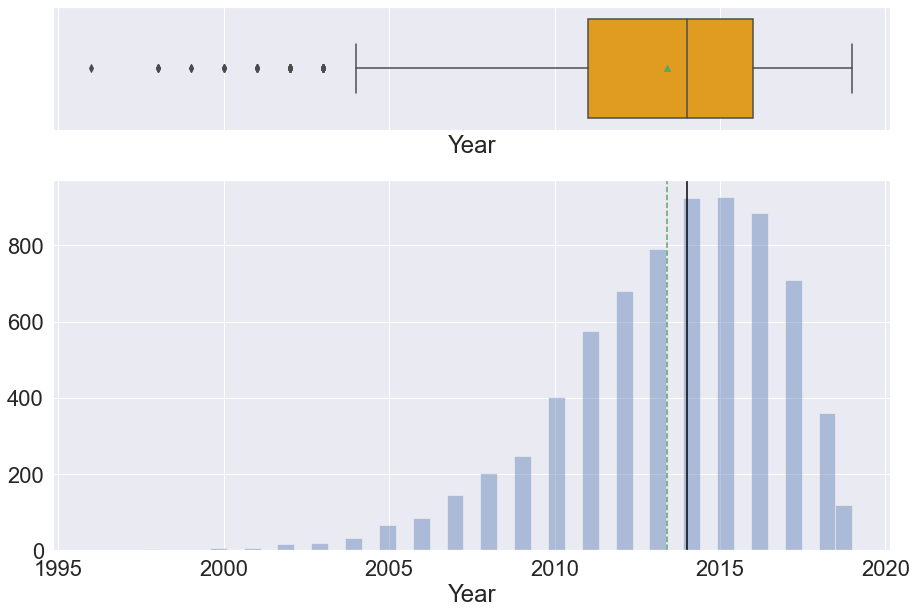

In [33]:
histogram_boxplot(df.Year)

In [34]:
df['Year'].describe()

count    7205.000000
mean     2013.388758
std         3.237501
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

In [35]:
#let's convert Year to Int64... will look cleaner without trailing zeroes

df["Year"] = df["Year"].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7205 non-null   category
 1   Year               7205 non-null   int64   
 2   Kilometers_Driven  7205 non-null   int64   
 3   Fuel_Type          7205 non-null   category
 4   Transmission       7205 non-null   category
 5   Owner_Type         7205 non-null   category
 6   Mileage            7205 non-null   float64 
 7   Engine             7205 non-null   int64   
 8   Power              7076 non-null   float64 
 9   Seats              7205 non-null   float64 
 10  Price              7205 non-null   float64 
 11  Name_Make          7205 non-null   object  
 12  Name_Model         7205 non-null   category
dtypes: category(5), float64(4), int64(3), object(1)
memory usage: 561.4+ KB


# Observations on YEAR (the age of the vehicle in Used Car Sales):  

The Mean is 2013 for the cars in this data set with the Median at 2014.  The data is left skewed.

The IQR is 5 years, with about 50% of the cars sold having a Model Year of 2011-2016.  There are quite a few outliers extending older than Model Year 2004, with no outliers on the newer side.  The "newest" used car in this data set is 2019.  The oldest car in the data set is from 1996.  This tells me that buyers tend to buy more vehicles in this window and it is potentially an inficator of perceived value and may influence Price.  

This also tells me that there are a small number of customers willing to buy much older cars.

# Kilometers_Driven

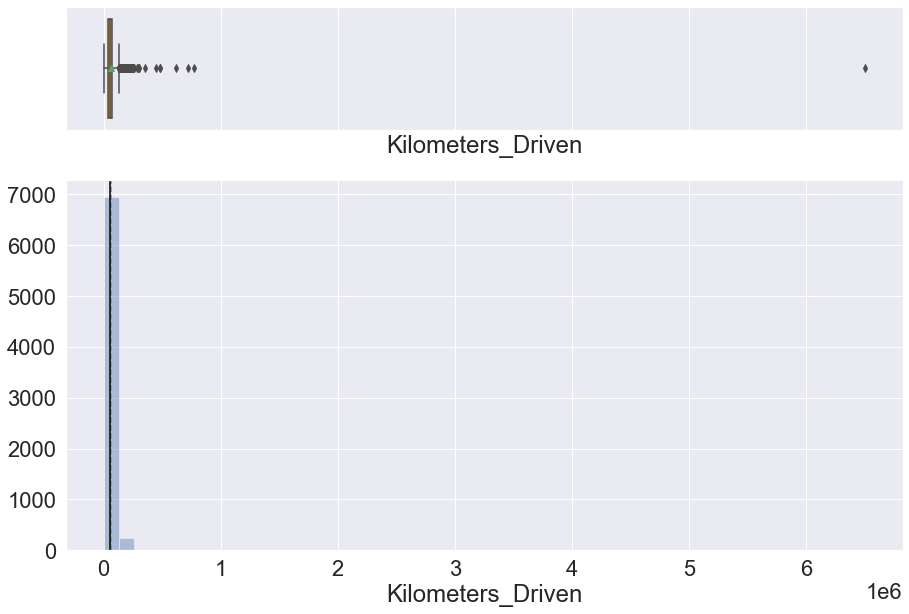

In [36]:
histogram_boxplot(df.Kilometers_Driven)



In [37]:
df['Kilometers_Driven'].describe()

count    7.205000e+03
mean     5.863672e+04
std      8.466067e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.328000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

# Observation:

There is at least one outlier (possibly more lying on top of one another) that is skewing the data significantly.  We will need to treat this to reasonably use this variable as a feature for the Model Build.   We need to review these outliers and see if they can be safely eliminated.  It appears that excluding outlier that the Kilometers Driven is well below 100K km driven for the cars in the data set which is reasonable based on what we know about typical usage and useful lives of vehicles.  We also need to address the scale of this variable so that it is closer to the other variables.

ACTION:  Explore outlier elimination.  Transform the scale.






# Mileage

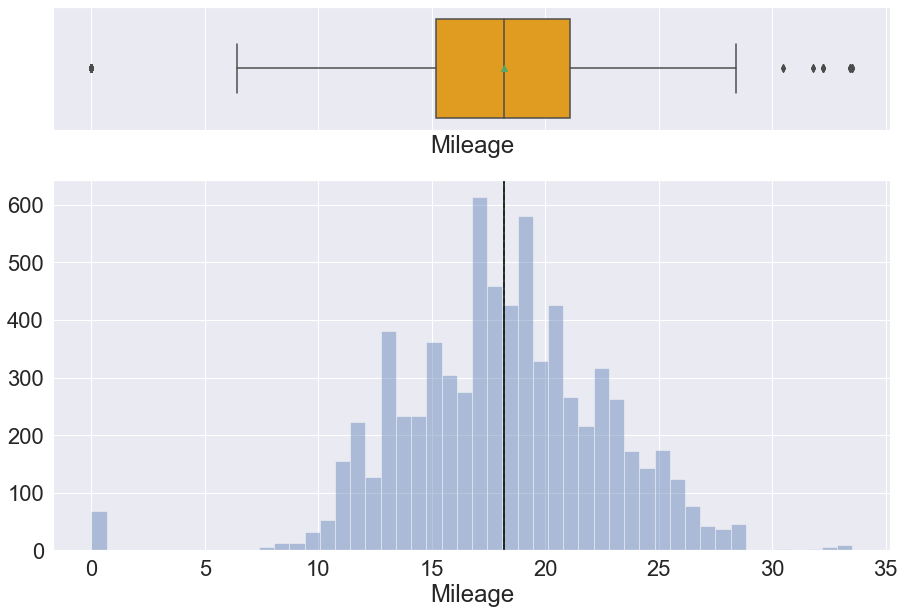

In [38]:
histogram_boxplot(df.Mileage)

In [39]:
df['Mileage'].describe()

count    7205.000000
mean       18.178300
std         4.513001
min         0.000000
25%        15.200000
50%        18.190000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

# Observation:

Data appears to be reasonable in magnitude.  The Mean and Median are almost equal, so the data is symmetrical.  There are outliers in both directions, but predominantly toward the rhs.  The max mileage is 33.54 kmpl (78.9 mpg) and a Mean = 18.178 kmpl (42.8 mpg).  Reuters.com reports that 2011 - 2019 new car average mileage of 22.4 mpg - 24.9 mpg on average. This suggest that the data is potential flawed.  We will accept the data as directional for now. 

1 kmpl = 2.52 mpg




# Engine


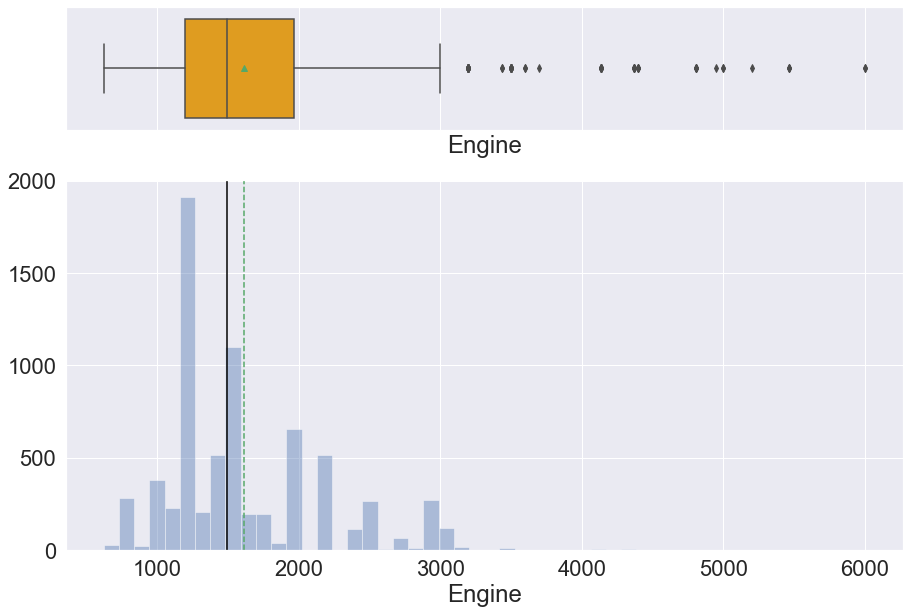

In [40]:
histogram_boxplot(df.Engine)

In [41]:
df['Engine'].describe()

count    7205.000000
mean     1616.762665
std       595.085712
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

# Observation:

The mean engine size is 1617 CC with a median of 1493 CC, so the data is slightly right skewed.

The smallest is 624 CC.  The largest is 5998 CC.

50% of the cars are between 1198 CC and 1968 CC.

This suggests that there are some cars with very small engine displacement and a general preference for engine displacement consistent with smaller to mid-size cars. We also have some really large engines, suggesting they may be high-performance or industrial size vehicles.



In [42]:
# Engine should be INT64 and need to convert Name_Make to category
df["Engine"] = df["Engine"].astype('int64')
df["Name_Make"] = df["Name_Make"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7205 non-null   category
 1   Year               7205 non-null   int64   
 2   Kilometers_Driven  7205 non-null   int64   
 3   Fuel_Type          7205 non-null   category
 4   Transmission       7205 non-null   category
 5   Owner_Type         7205 non-null   category
 6   Mileage            7205 non-null   float64 
 7   Engine             7205 non-null   int64   
 8   Power              7076 non-null   float64 
 9   Seats              7205 non-null   float64 
 10  Price              7205 non-null   float64 
 11  Name_Make          7205 non-null   category
 12  Name_Model         7205 non-null   category
dtypes: category(6), float64(4), int64(3)
memory usage: 513.6 KB


# Power

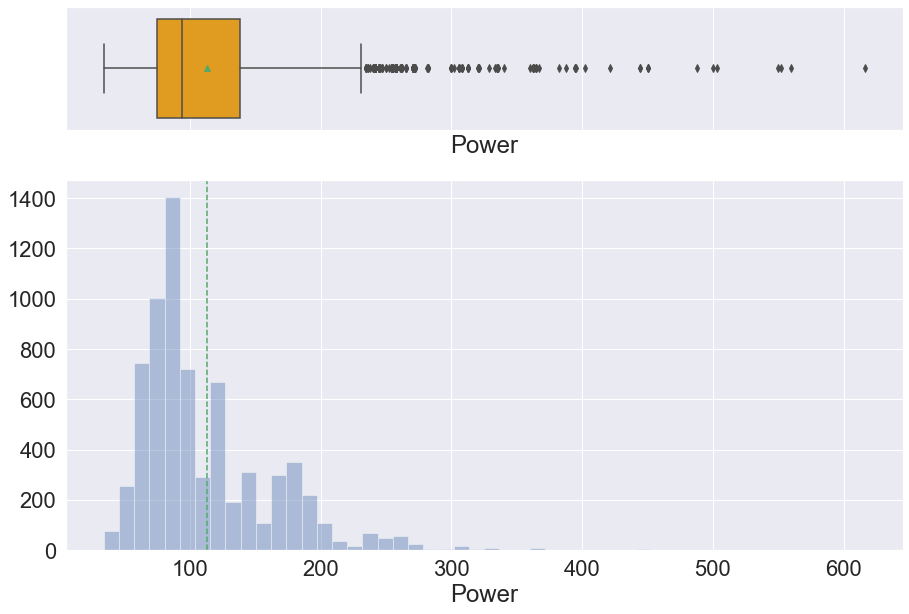

In [43]:
histogram_boxplot(df.Power)


In [44]:
df['Power'].describe(include='all')

count    7076.000000
mean      112.780976
std        53.492219
min        34.200000
25%        75.000000
50%        94.340000
75%       138.100000
max       616.000000
Name: Power, dtype: float64

# Observation:

Power data is right skewed with a significant number of outliers.  The mean power is 112 bhp with 50% of the power ratings being between 75 to 138 bhp.  The max of 616 bhp is probably associated with a high performance car, such as the Lambo we saw earlier in the Make list.  The minimum power is 34.2 bhp. 

We need to look closely at whether we really need both Engine size and Power...they should be somewhat correlated.  We will look at this when we get to multivariate analysis.

# Seats

In [45]:
#check to ensure Seats are now an integer

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7205 non-null   category
 1   Year               7205 non-null   int64   
 2   Kilometers_Driven  7205 non-null   int64   
 3   Fuel_Type          7205 non-null   category
 4   Transmission       7205 non-null   category
 5   Owner_Type         7205 non-null   category
 6   Mileage            7205 non-null   float64 
 7   Engine             7205 non-null   int64   
 8   Power              7076 non-null   float64 
 9   Seats              7205 non-null   float64 
 10  Price              7205 non-null   float64 
 11  Name_Make          7205 non-null   category
 12  Name_Model         7205 non-null   category
dtypes: category(6), float64(4), int64(3)
memory usage: 513.6 KB


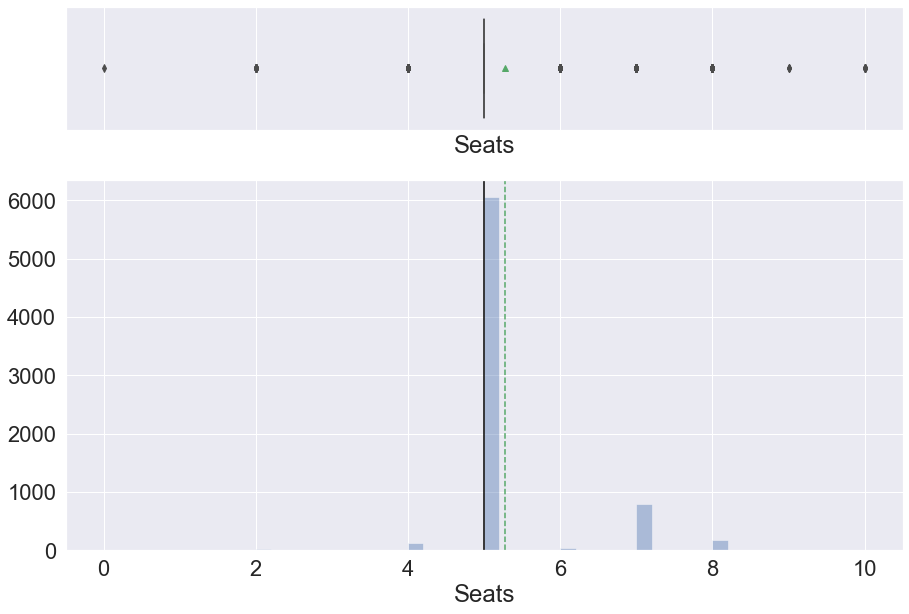

In [46]:
histogram_boxplot(df.Seats)

In [47]:
df['Seats'].describe(include='all')

count    7205.000000
mean        5.279528
std         0.811411
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

# Observation:  

The data is right skewed.  However, the IQR ~= to the mean.  25%, 50%, and 75% Quantile.  It's unclear if this variable will be helpful in building the pricing model.

Almost all of the cars have 5 seats (Mean and Median) are equal.  The are a small number of 4 seaters, and 8 seaters. The only other value is 7 seaters at about 10% of the values. All the seat counts are effectively outliers other than 5 seats.  This suggests that cars have at least 5 seats capacity and this is not a significantly influential variable for model development.  This is a candidate to drop after we look it closer.



# Price

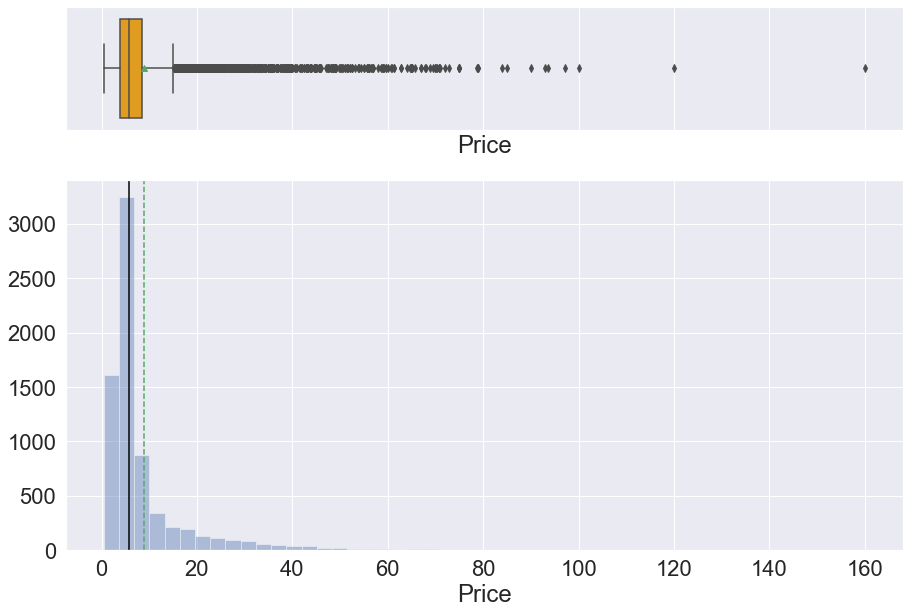

In [48]:
histogram_boxplot(df.Price)

In [49]:
df['Price'].describe(include='all')

count    7205.000000
mean        8.840215
std        10.308417
min         0.440000
25%         3.870000
50%         5.640000
75%         8.400000
max       160.000000
Name: Price, dtype: float64

# Observation: 

Price (our dependent variable) is right skewed with a grand max that is 20X larger than the mean value.  We will need to consider outlier treatment later.

The IQR is 5.  This tells me there are signifincant number of outliers which will affect our model.

It's also possible that we need to transform the data.

In [50]:
price_bar_lakh_INR = df['Price'].mean ()
conversion_rate_USD = 1377.61 
# as of Mar 19, 5:20 AM UTC - source:  Morningstar
price_bar_USD = price_bar_lakh_INR * conversion_rate_USD
print ('Mean Price in lakh INR', price_bar_lakh_INR)
print ('Mean Price in USD', price_bar_USD)
       


Mean Price in lakh INR 8.840215128382955
Mean Price in USD 12178.368763011642


# Observations:

The numbers for pricing are reasonable in Scale. The data is right skewed with a significant number of outliers.

# Numerival Variable Distributions & Outliers

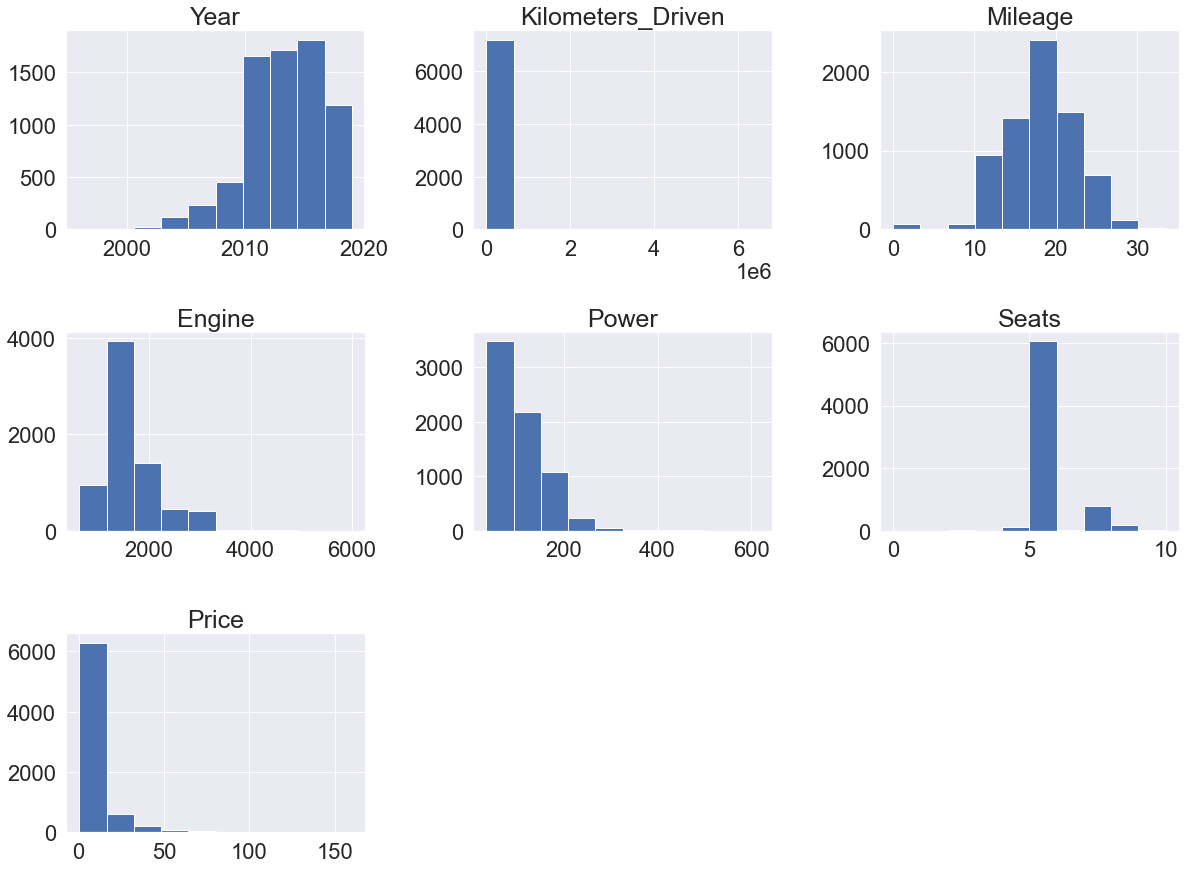

In [51]:
#Cite reference:  from Life Expectancy Case Stdy
# aggregate the histograms into one spot

from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
# all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

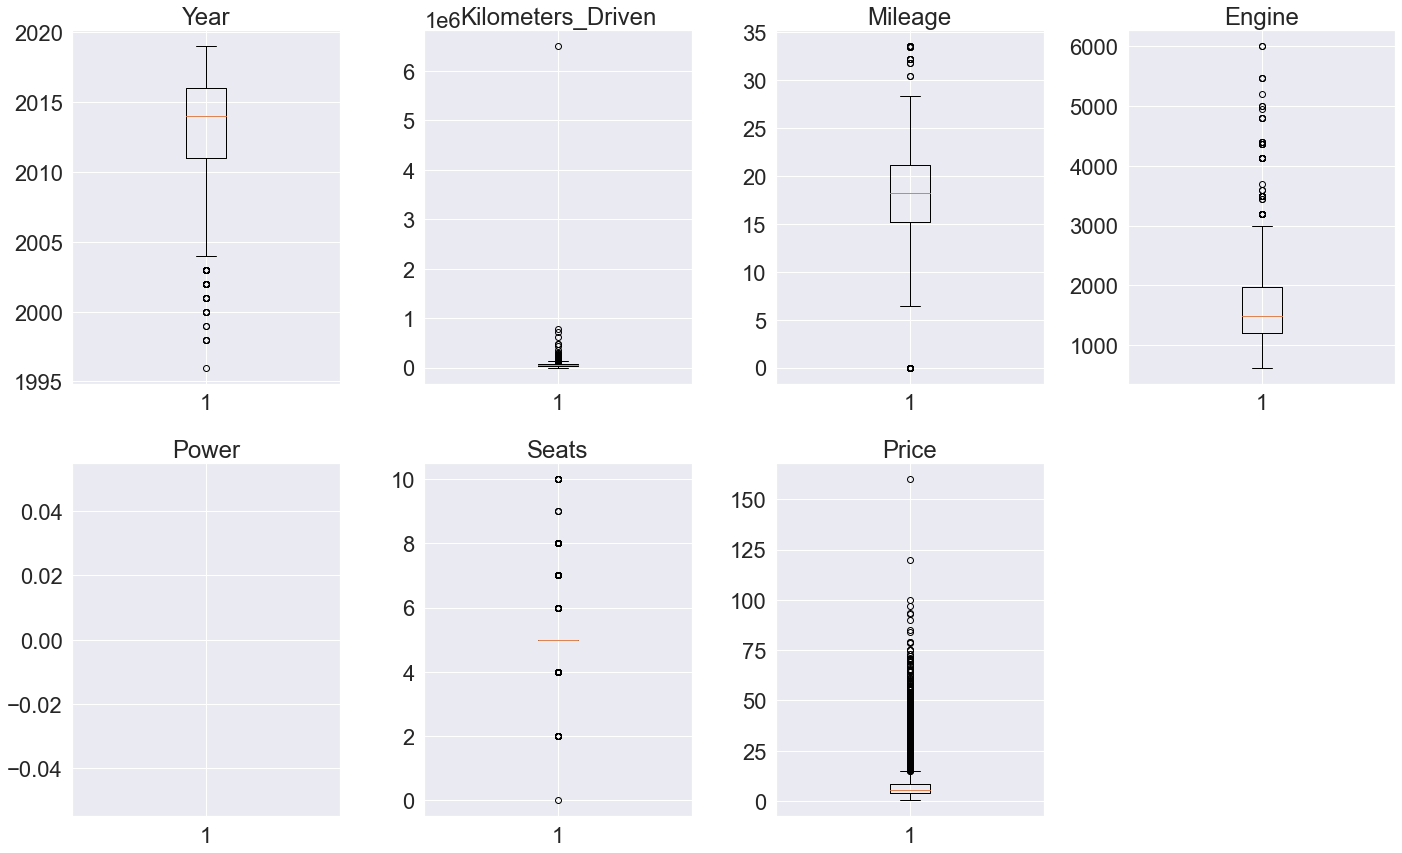

In [52]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column as it is temporal variable

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Observations:

There are a significant number of outliers with Price, Year, Engine....We will treat all the outliers later and look to see if we have acceptable model performance.



In [53]:
df['Power'].describe(include='all')

count    7076.000000
mean      112.780976
std        53.492219
min        34.200000
25%        75.000000
50%        94.340000
75%       138.100000
max       616.000000
Name: Power, dtype: float64

In [54]:
df['Power'].isnull().sum()

129

In [55]:
df['Power'] = df['Power'].fillna(0)

In [56]:
df['Power'].isnull().sum()

0

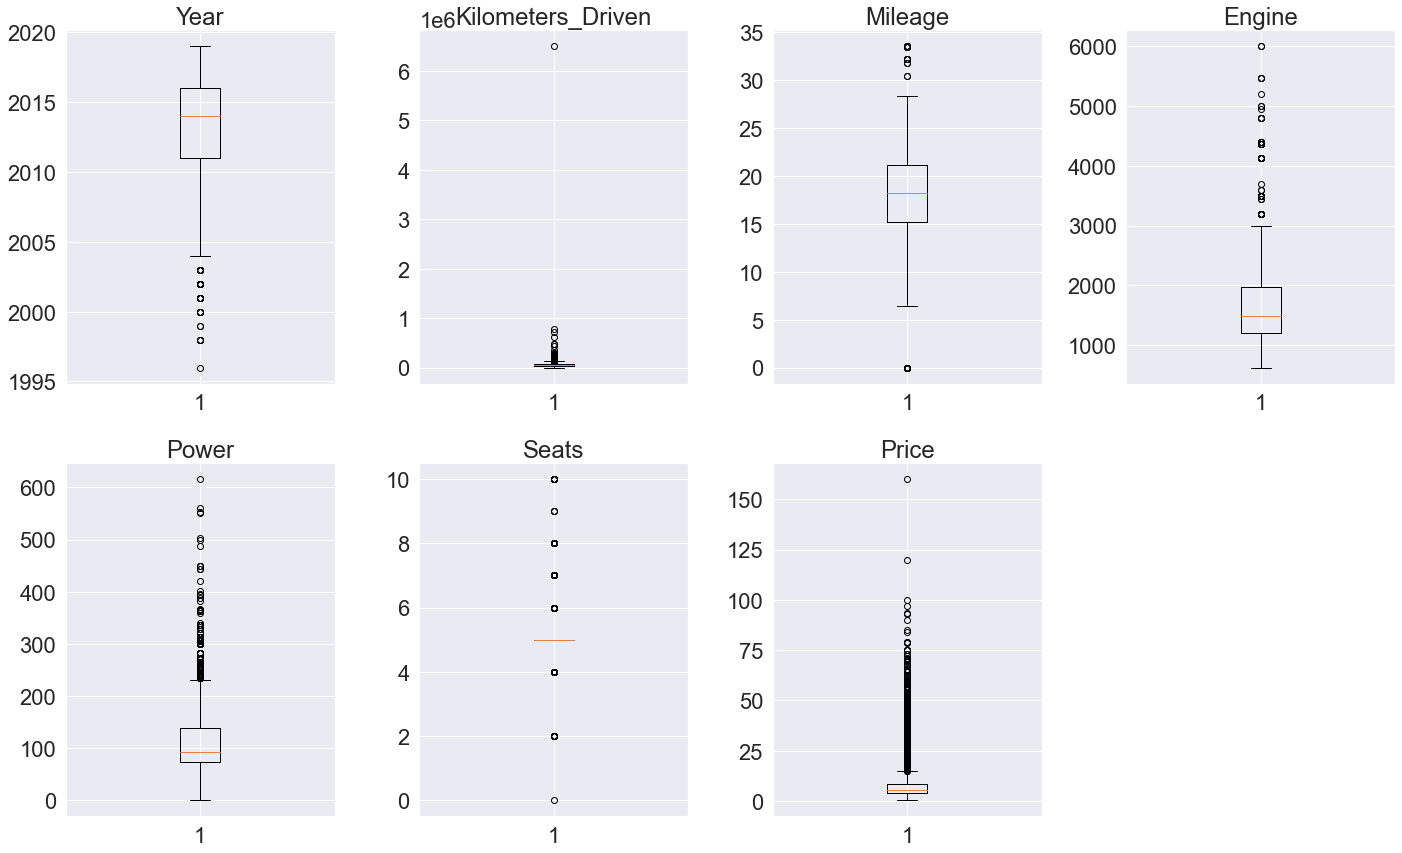

In [57]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column as it is temporal variable

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# CATEGORICAL EDA

# Location

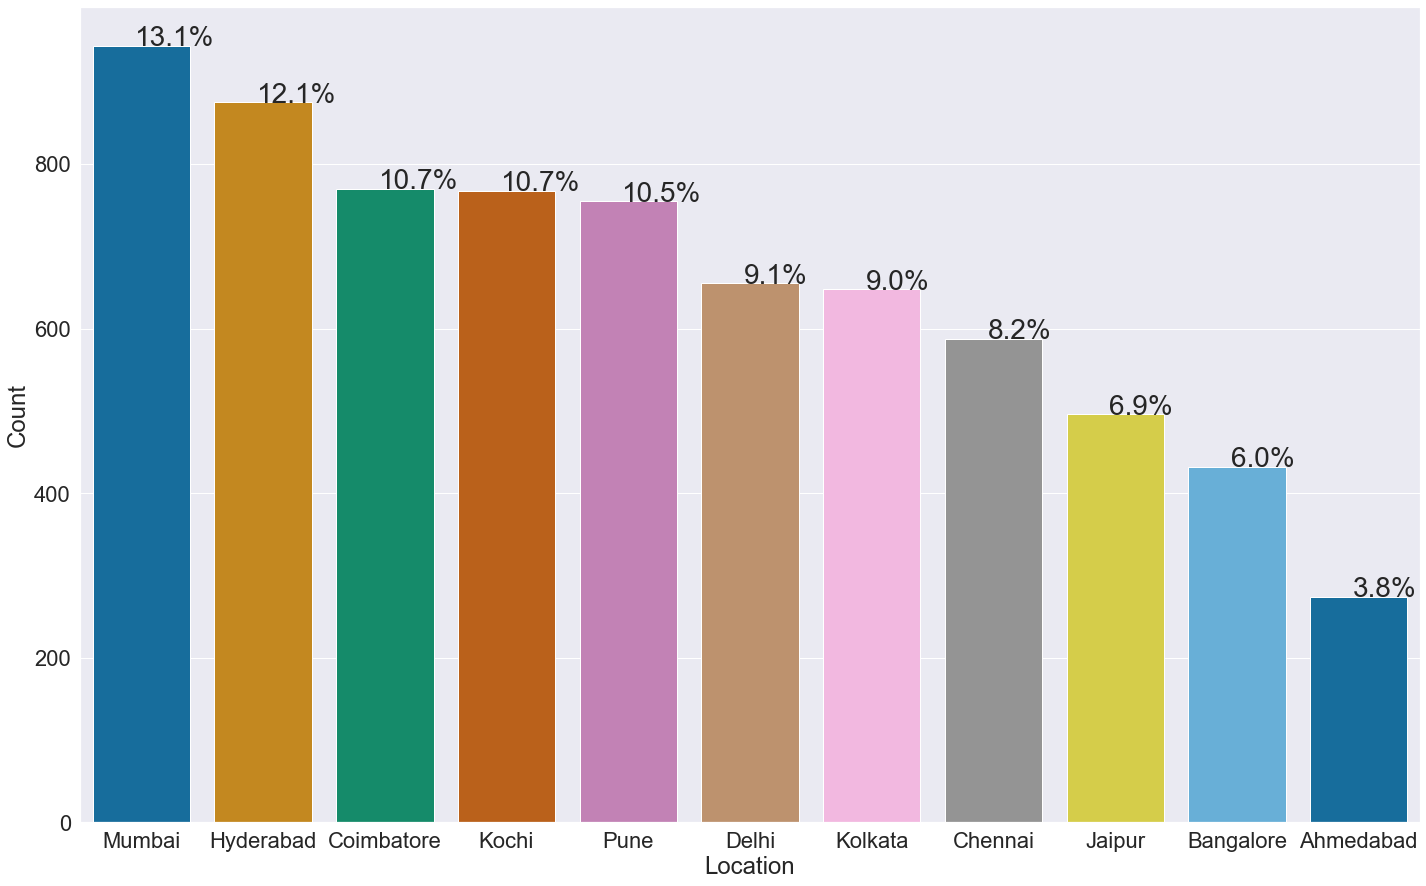

In [58]:
plt.figure(figsize=(24,15))
ax = sns.countplot(df['Location'], palette = "colorblind", order = df['Location'].value_counts().index)
plt.xlabel ('Location')
plt.ylabel ('Count')
bar_perc (ax, df['Location'])



# Observations 

At first glance, the cities with higher populations represent a larger percentage of used car sales but this would need to be validated. 



# Fuel Type

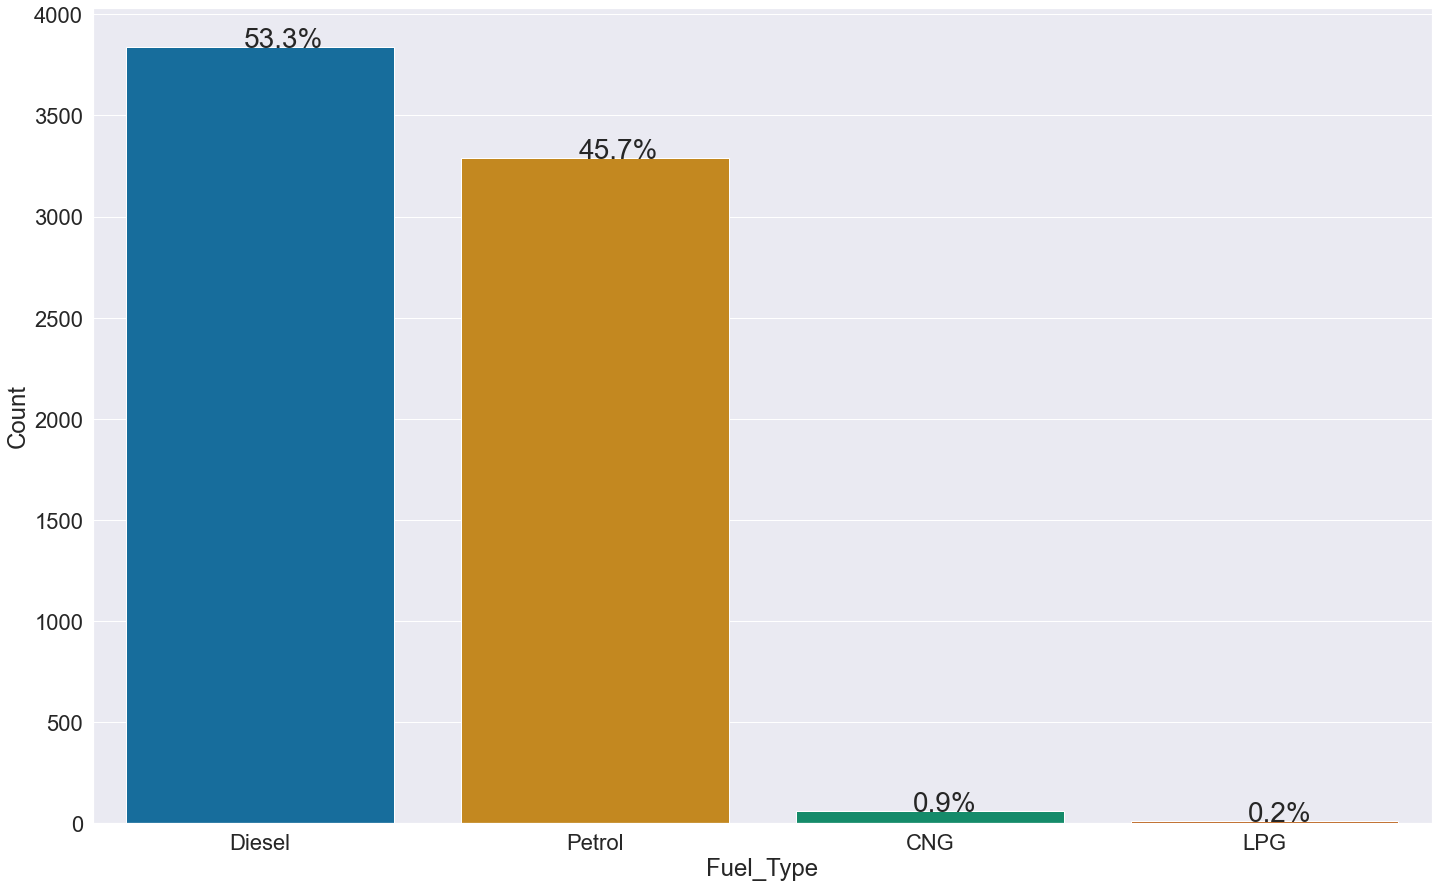

In [59]:
plt.figure(figsize=(24,15))
ax = sns.countplot(df['Fuel_Type'], palette = "colorblind", order = df['Fuel_Type'].value_counts().index)
plt.xlabel ('Fuel_Type')
plt.ylabel ('Count')
bar_perc (ax, df['Fuel_Type'])

# Observations

Alternative fuels such as CNG are not popular (make up 1% of all used car fuel types).  Diesel and Petrol (gasoline) are the most popular with Diesel being more prevalent in used car sales by 8%.


# Transmission

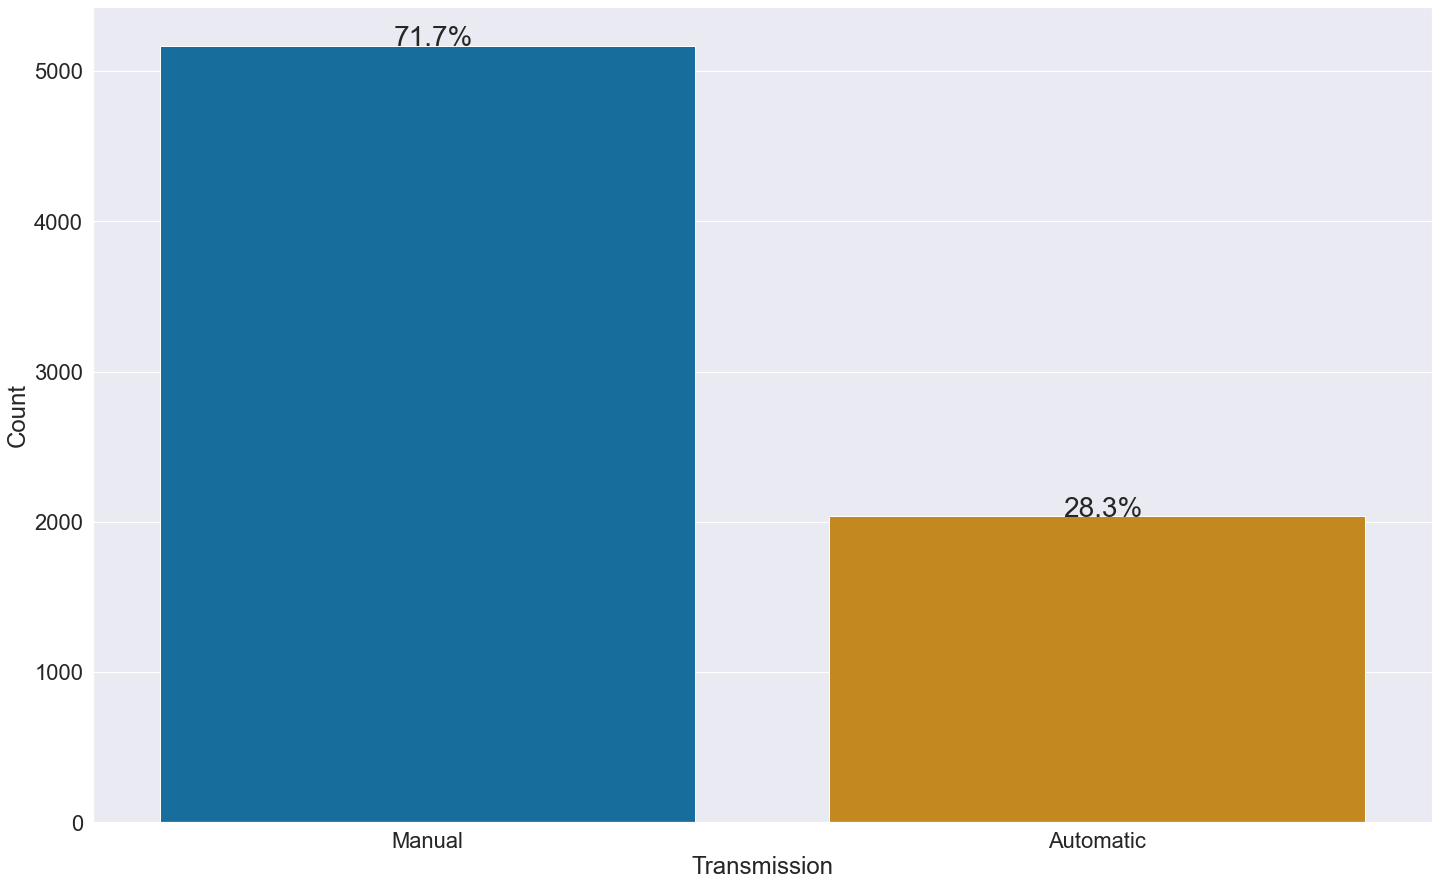

In [60]:
plt.figure(figsize=(24,15))
ax = sns.countplot(df['Transmission'], palette = "colorblind", order = df['Transmission'].value_counts().index)
plt.xlabel ('Transmission')
plt.ylabel ('Count')
bar_perc (ax, df['Transmission'])

# Observation

~28.3% of all cars sold are Automatic.  Manual transmissions are clearly more popular.



# Owner Type

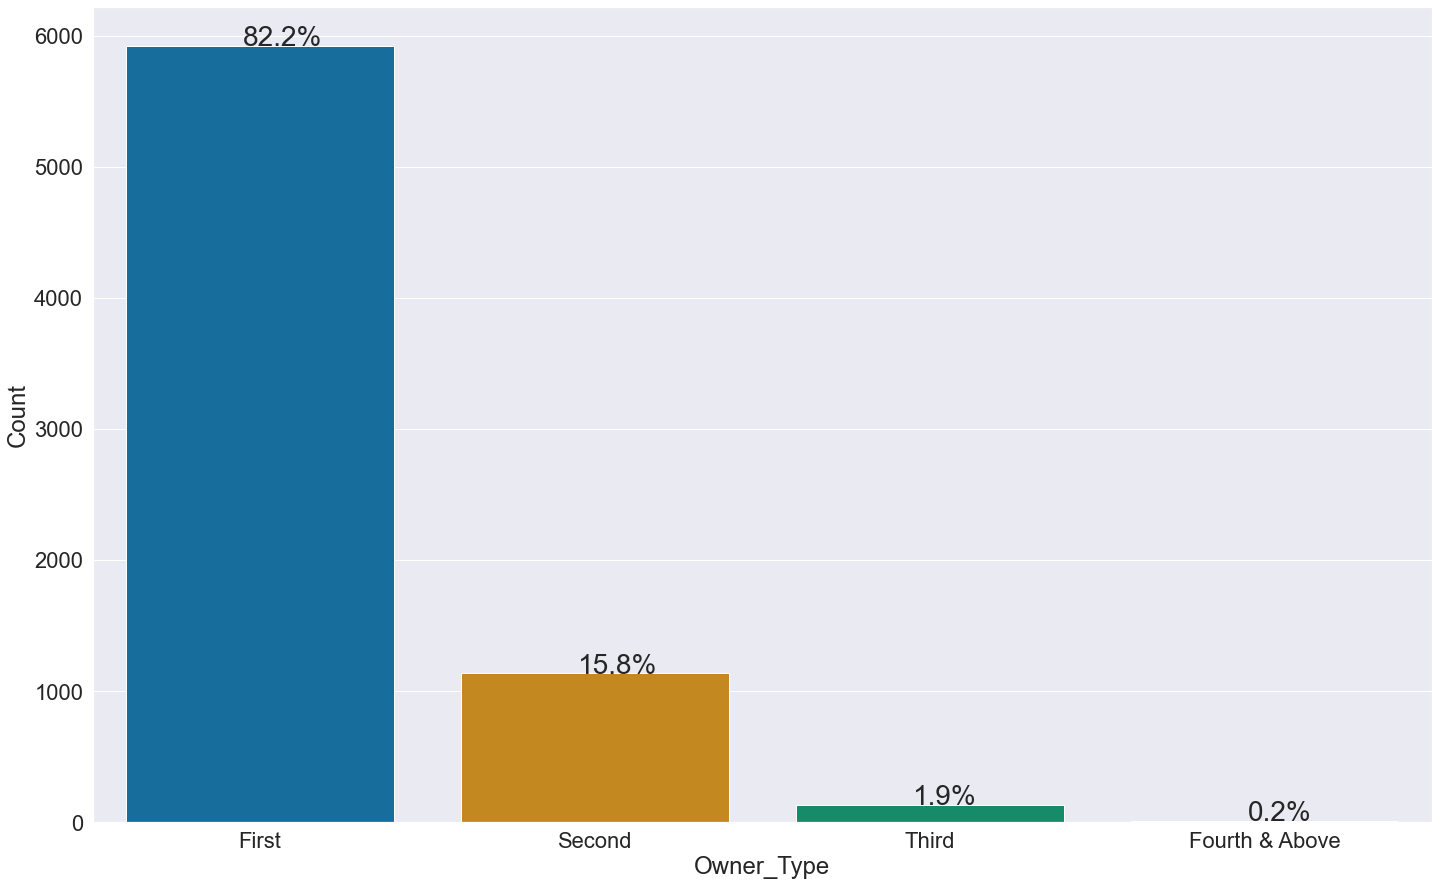

In [61]:
plt.figure(figsize=(24,15))
ax = sns.countplot(df['Owner_Type'], palette = "colorblind", order = df['Owner_Type'].value_counts().index)
plt.xlabel ('Owner_Type')
plt.ylabel ('Count')
bar_perc (ax, df['Owner_Type'])

# Observation

82% of used car sales are represented by the First Time Owner selling the car.  15.8% coming from the Second.  Combined - 98% of the data. ~2% of Used Car sales come from Third or Fourth & Above owner types.  
Questions :  is this because of preference of the buyer vs. wearout on vehicles (i.e., is there a connection between the mode Year vs. Owner_Type).




# Bi-Variate Analysis :  exploring insights related to our target dependent variable "Price"

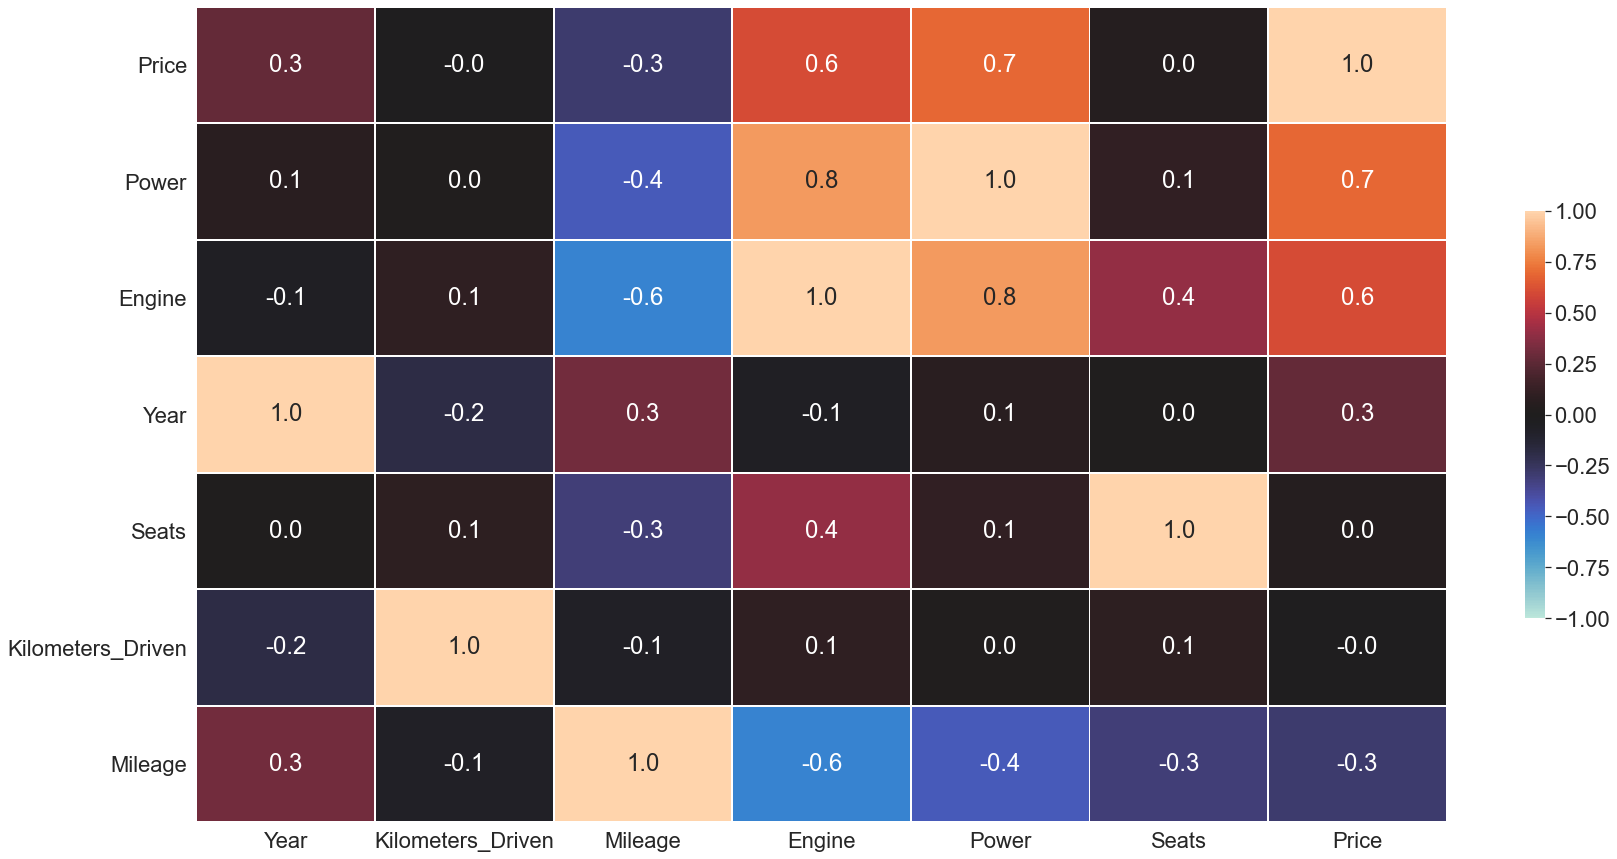

In [62]:

# correlation matrix
# cite reference:  leveraging a code snipet from the Life Expectancy Use Case

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column 
corr = df[numeric_columns].corr().sort_values(by=['Price'],ascending= False) # sorting correlations with respect to Price 

#cmaps['Perceptually Uniform Sequential'] = [
#            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

#cmaps['Sequential'] = [
#            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='icefire', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

# Observations

Price is strongly, positively correlated with Engine and Power.  There is a mild positive correlation in Price and Model Year.  There is a mild to low negative correcation with Mileage.  

What this means is that the larger the Engine displacement and increaseing Power.  Conversely, as Mileage goes down, Price increases. This means the newer the car, the higher the Price.

# Price v. Year v. Fuel Type

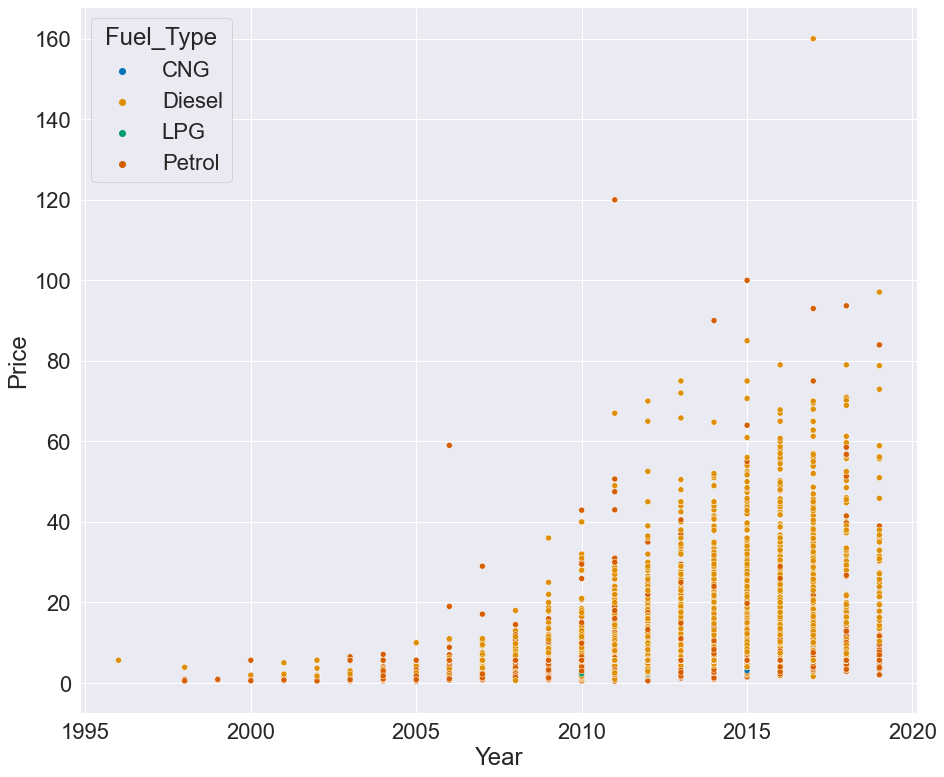

In [63]:
# Visualize Price v. Year v. Fuel Type
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Year', hue='Fuel_Type', data=df, palette ='colorblind');

# Observations

Used Car pricing by Fuel_Type has steadily increased year over year.



# Price v. Year v. Transimission Type

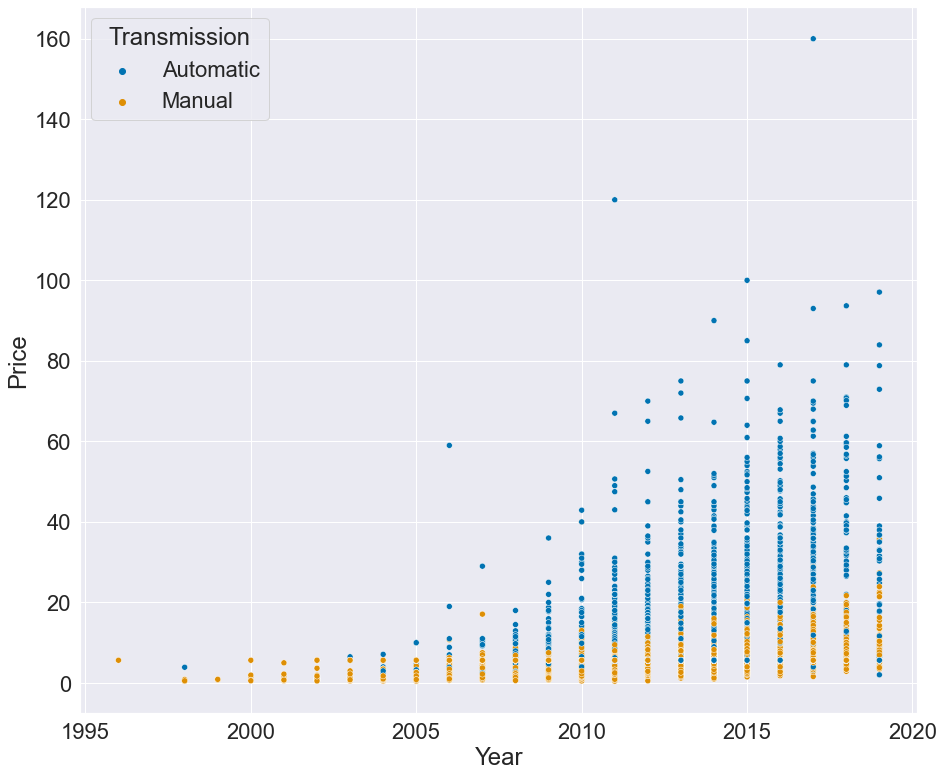

In [64]:
# Visualize Price v. Year v. Transmission
# Visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Year', hue='Transmission', data=df, palette ='colorblind');

# Observation

Automatic Transmission type used cars have directionally grownn in price at a faster rate than manual transmission used cars year over year.

Before 2003, Automatic Transmissions in Used cars weren't readily sold for the cars represented in this dataset.  Automatics started to gain popularity in 2006.

# Price v. Mileage v. Fuel Type


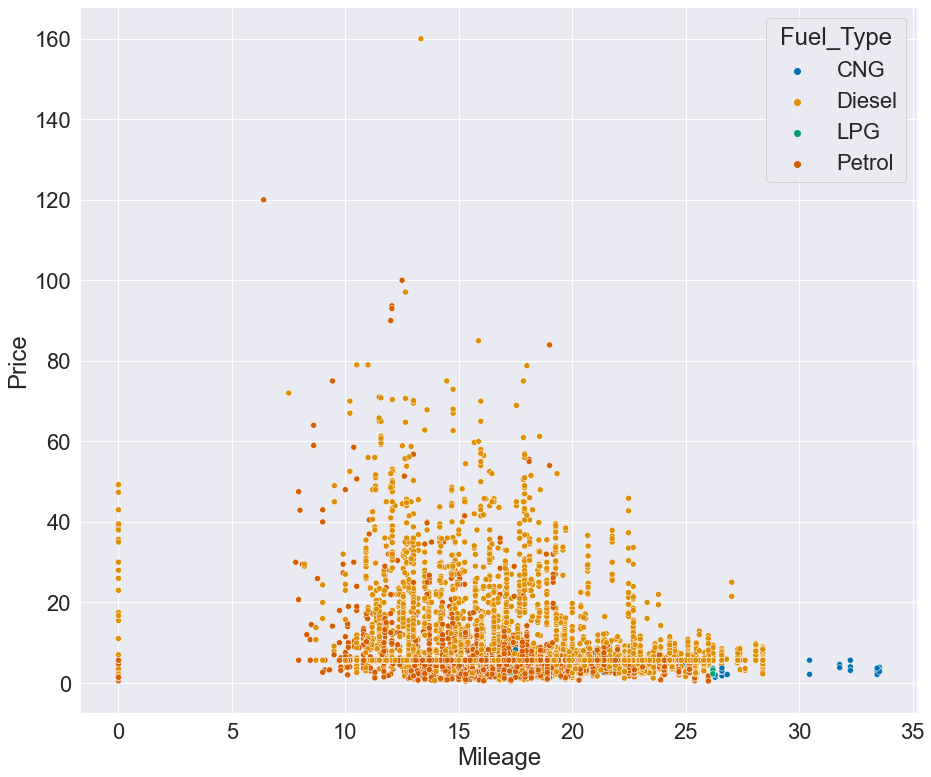

In [65]:
# Visualize Price v. Mileage v. Fuel Type
# Visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=df, palette ='colorblind');

# Price v. Mileage v. Transimission 


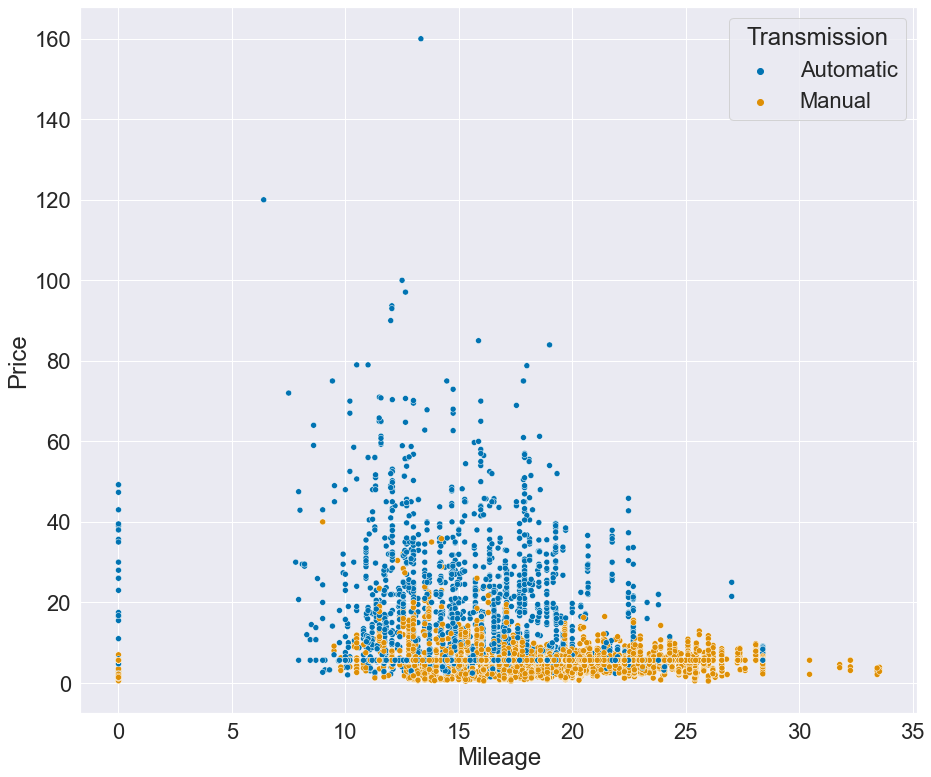

In [66]:
# Visualize Price v. Mileage v. Tranmission
# Visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Mileage', hue='Transmission', data=df, palette ='colorblind');

# Observation

The price of cars with Automatic Transmissions has a higher value (Price) regardless of Mileage (efficiency). There is significant variation in the price however as Mileage increases, sugesting other influencers to Pricing.  Manual transmissions tend to have a flatter Price variation with increasing Mileage.  The impact of Fuel Type on the shot pattern is very similar.  We can see outliers for both Fuel_Type and Transmission, as well as several data reporting zero Mileage.



# Price and Power v. Year

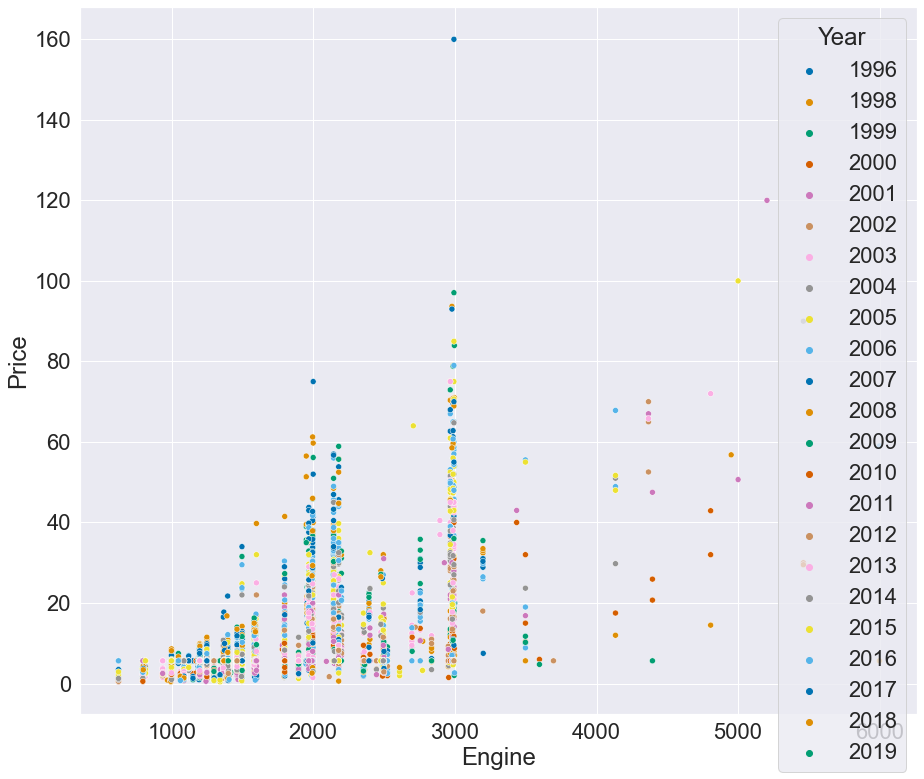

In [67]:
# Lets look visualize the relationship between Price and Power vs. Year
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Engine',hue ='Year', palette = 'colorblind', data = df);

# Location v. Price v. Fuel Type


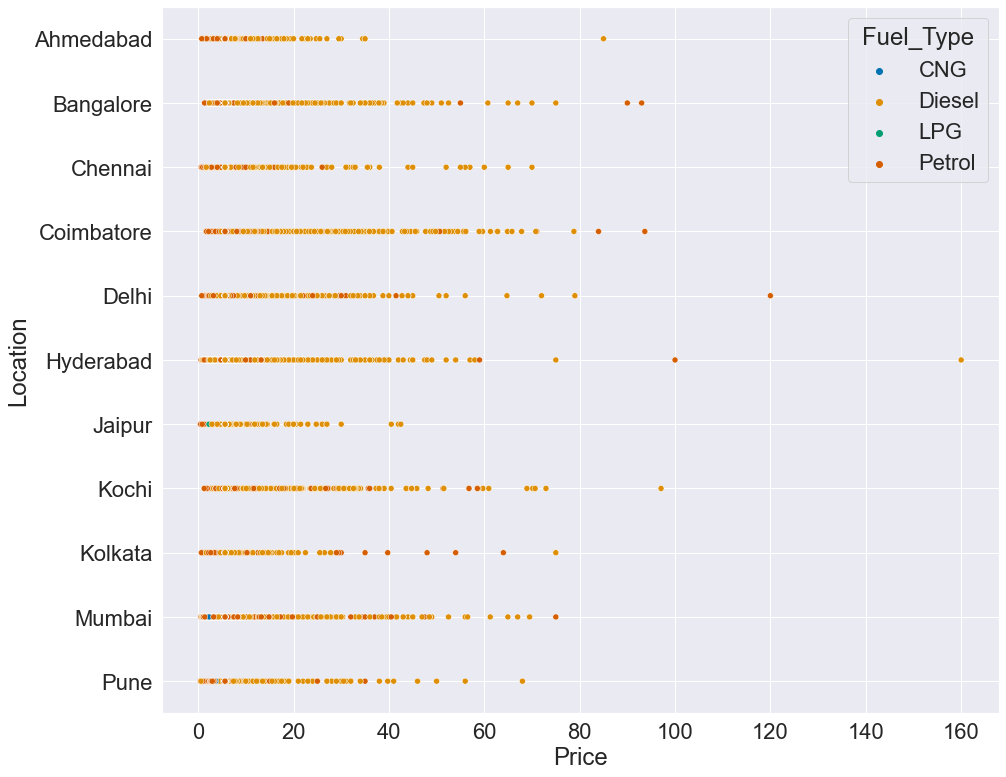

In [68]:
# Visualize Location v. Price v. Fuel Type
# Visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(x='Price', y='Location', hue='Fuel_Type', data=df, palette ='colorblind');

# Location v. Price v. Transmission


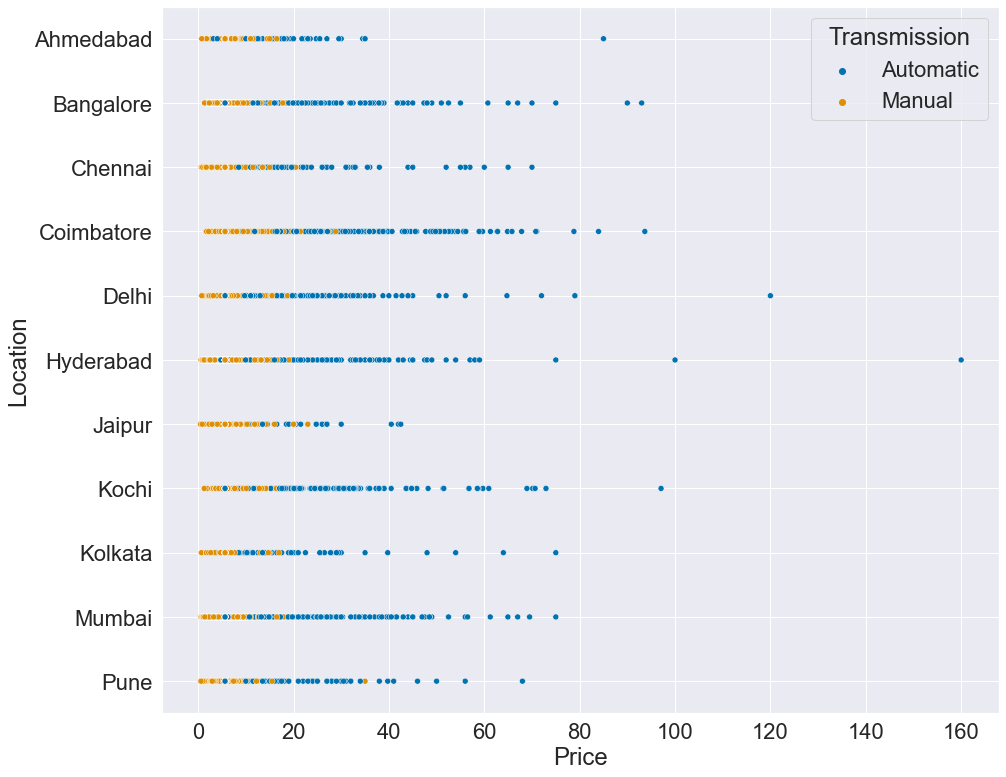

In [69]:
# Visualize Location v. Price v. Transmission
# Visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(x='Price', y='Location', hue='Transmission', data=df, palette ='colorblind');

# Observations

There are no obvious trends by location that would deviate from what we have learned and commented on already about pricing for Automatic v. Manual used cars, or pricing for different fuel types.



# Owner Type v. Price v. Transmission


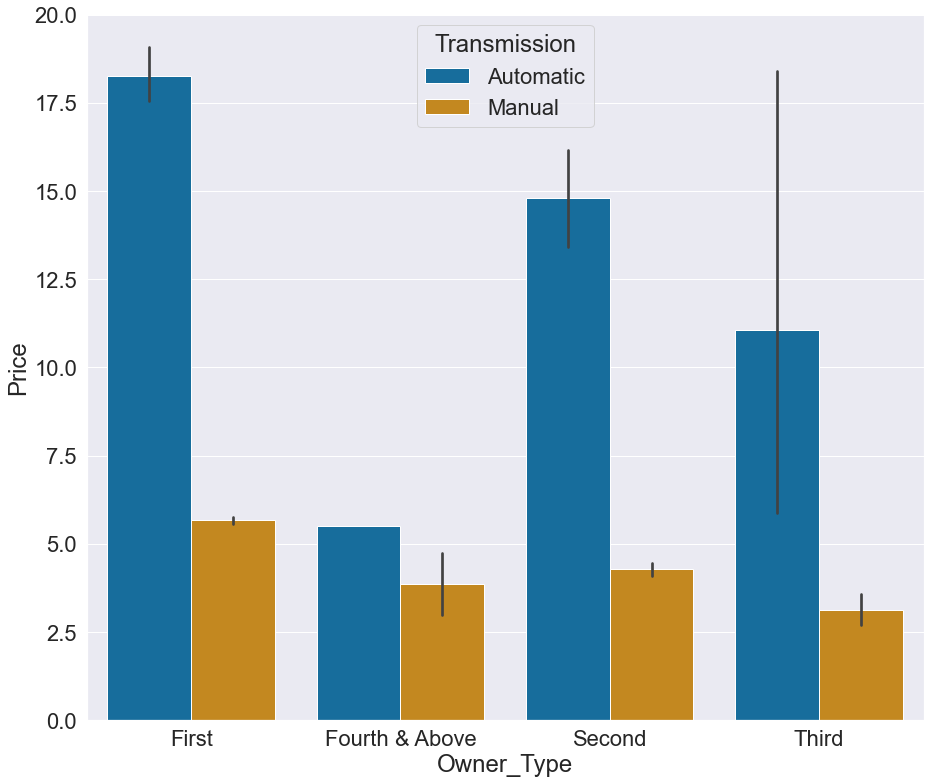

In [70]:
#visualize Owner_Type v. Price

plt.figure(figsize=(15,13))
sns.barplot(y ='Price',  x ='Owner_Type',hue ='Transmission', palette = 'colorblind', data = df);

# Power v. Name_Make v. Year (revisit)

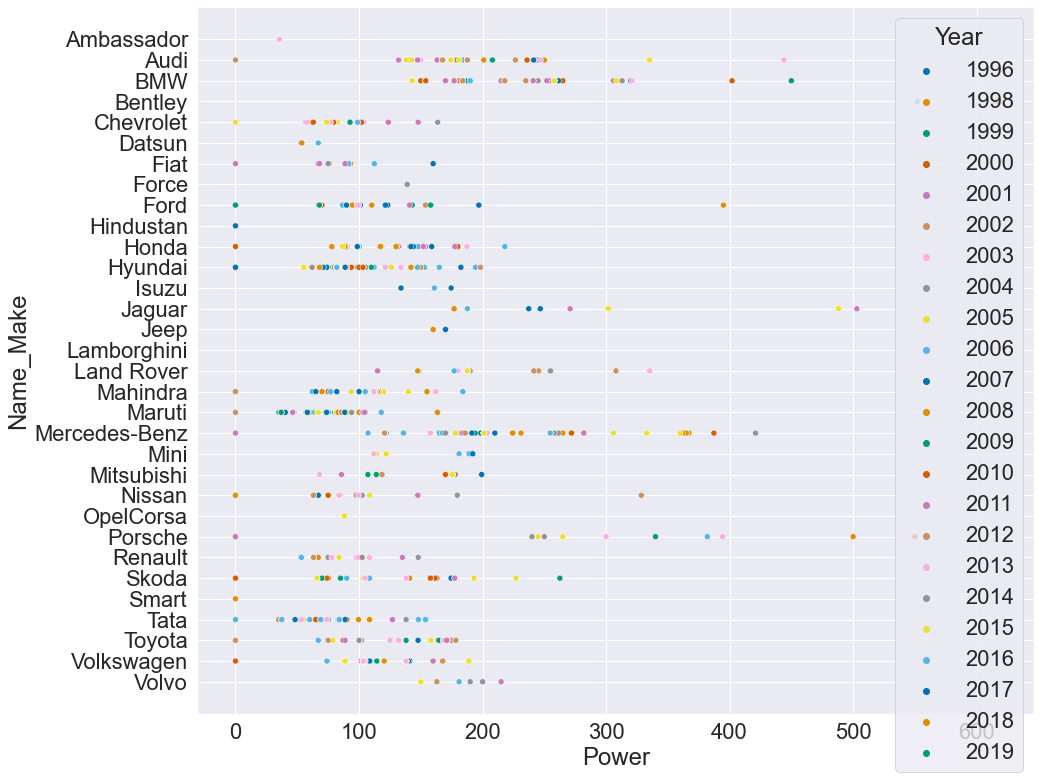

In [71]:
# Lets look visualize the relationship between Power and Name_Make
plt.figure(figsize=(15,13))
sns.scatterplot(y='Name_Make', x='Power',hue ='Year', palette = 'colorblind', data = df);

# Price v. Location v. Name_Make (revisit)


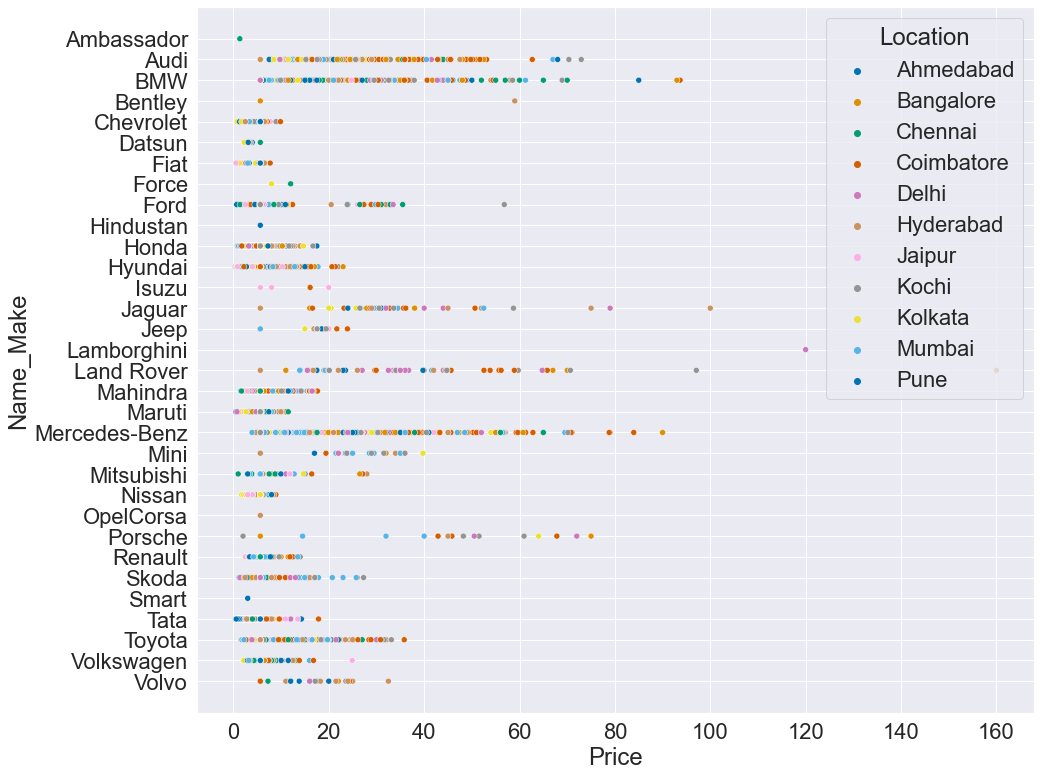

In [72]:

plt.figure(figsize=(15,13))
sns.scatterplot(y='Name_Make', x='Price',hue ='Location', palette = 'colorblind', data = df);

# Price v. Year

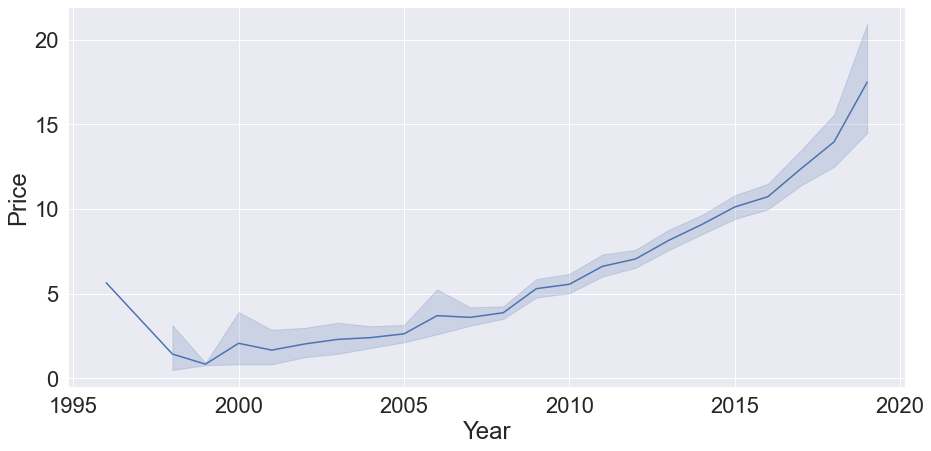

In [73]:

plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price', data=df, palette ='colorblind');



# Observation

Price increases over time based on inflation and other economic factors.

# Price v. Kilometers_Driven

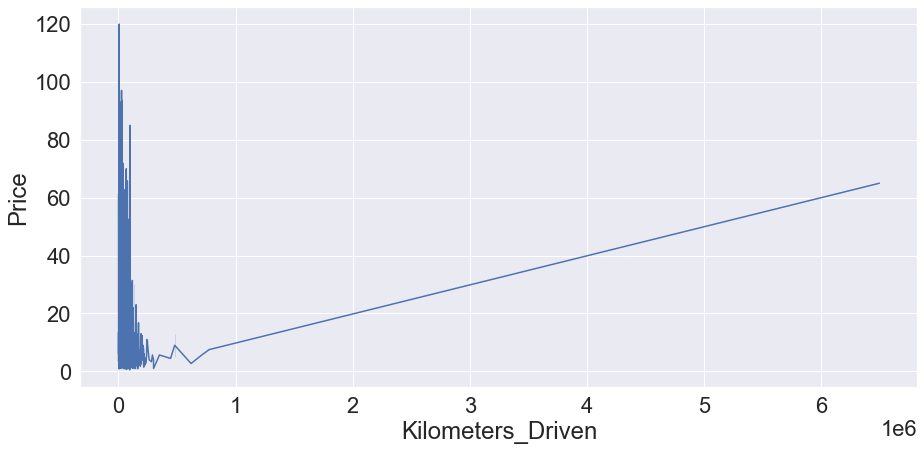

In [74]:

plt.figure(figsize=(15,7))
sns.lineplot(x='Kilometers_Driven', y='Price', data=df, palette ='colorblind');



# Observation

Any sort of pattern is obscured by an extreme outlier(s).  We need to treat outliers and transform.

# Price v. Mileage

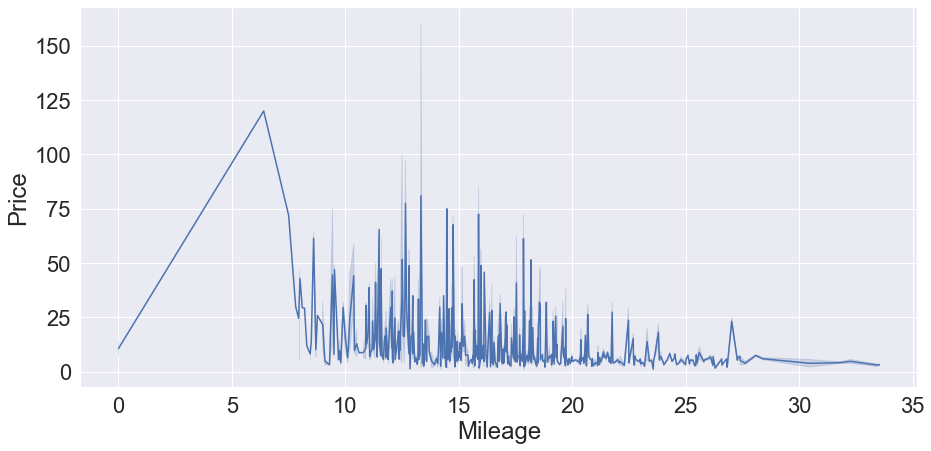

In [75]:

plt.figure(figsize=(15,7))
sns.lineplot(x='Mileage', y='Price', data=df, palette ='colorblind');

# Observation

Pricing is quite volatile with respect to Mileage.



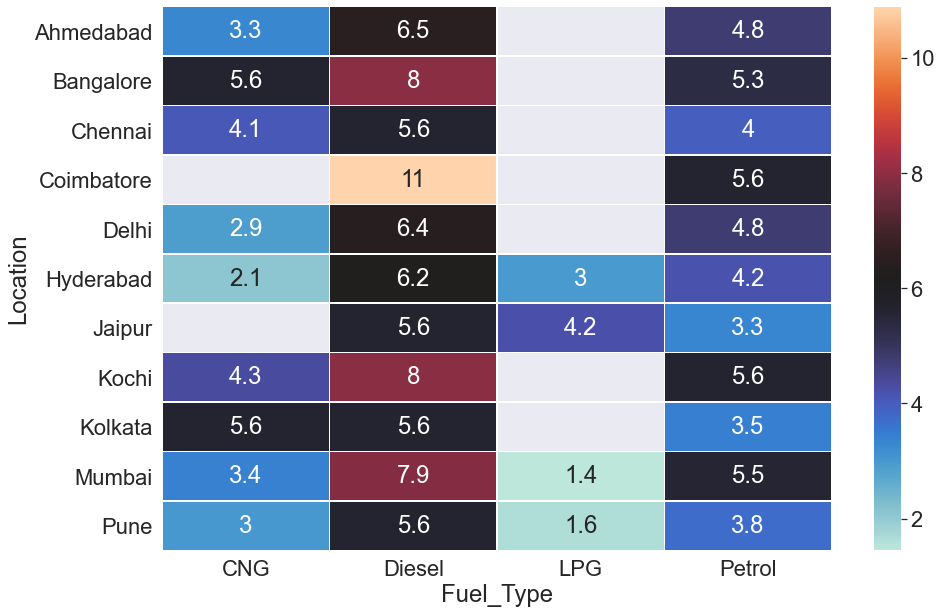

In [76]:
df_hm =df.pivot_table(index = 'Location',columns ='Fuel_Type',values ="Price",aggfunc=np.median)
# Draw a heatmap 
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_hm,   cmap='icefire',linewidths=.5, annot=True, ax=ax);

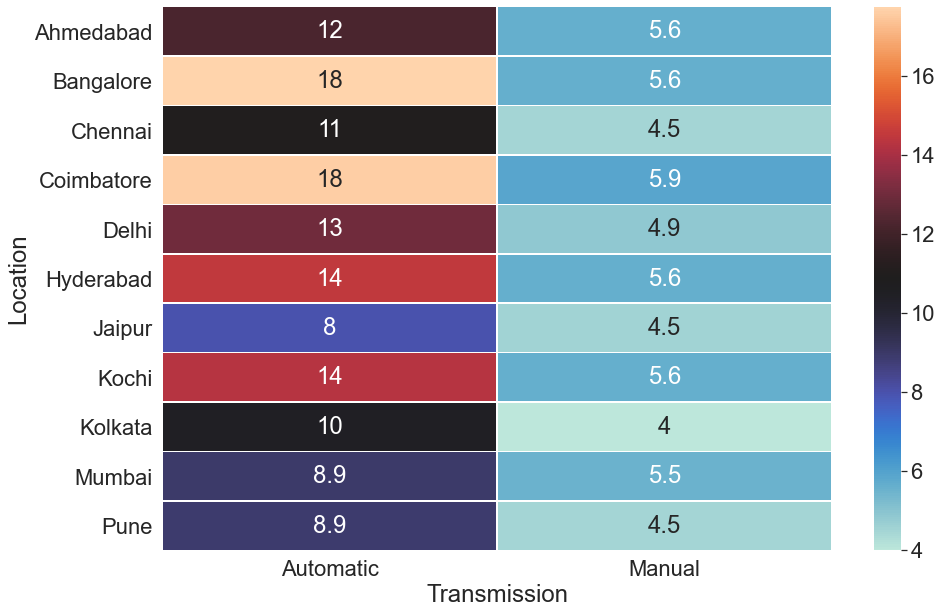

In [77]:
df_hm =df.pivot_table(index = 'Location',columns ='Transmission',values ="Price",aggfunc=np.median)
# Draw a heatmap 
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_hm,   cmap='icefire',linewidths=.5, annot=True, ax=ax);

# Observation


There is a noticeable difference in the Median price for an Automatic by City or Urban Aggregation. Manual Median price is fairly stable through out.  Automatics clearly have a premium by location, but could be influenced by other factors such as Make-Model.  A notable callout of pricing in Coimbatore :  Transmission Type and Fuel Type have a significantly different median price compared to other locations:  Particularly Automatic - Diesels.

# 3. MODEL BUILDING

# DATA PREPARATION

# Variable Transforms

At this point, I want to add some transformed variables for variables that appear to have scale issues which could affect model performance. 

#  Transform Kilometers_Driven 

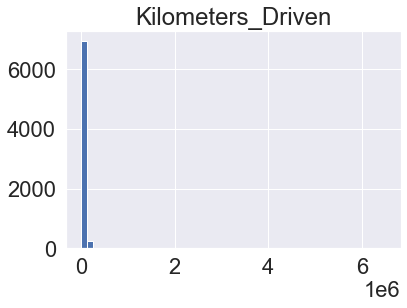

0


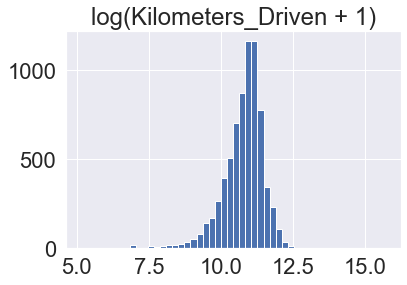

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7205 non-null   category
 1   Year                   7205 non-null   int64   
 2   Kilometers_Driven      7205 non-null   int64   
 3   Fuel_Type              7205 non-null   category
 4   Transmission           7205 non-null   category
 5   Owner_Type             7205 non-null   category
 6   Mileage                7205 non-null   float64 
 7   Engine                 7205 non-null   int64   
 8   Power                  7205 non-null   float64 
 9   Seats                  7205 non-null   float64 
 10  Price                  7205 non-null   float64 
 11  Name_Make              7205 non-null   category
 12  Name_Model             7205 non-null   category
 13  Kilometers_Driven_Log  7205 non-null   float64 
dtypes: category(6), float64(5), int64(3)
mem

In [78]:
# Log Transformation  :  code reference from FIFA 2019 Case Study


cols_to_log = ['Kilometers_Driven']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))
    
    
    
plt.hist(np.log(df['Kilometers_Driven'] + 1), 50)  # data has some zeroes, shift by 1 unit
plt.title('log(Kilometers_Driven + 1)') 
plt.show()

#referece code snipets for alternate transformation techniques

#plt.hist(np.arcsinh(df['variable']), 50)
#plt.title('arcsinh(variable)')
#plt.show()
#plt.hist(np.sqrt(df['variable']), 50)
#plt.title('sqrt(variable)')
#plt.show()


#for colname in cols_to_log:

df['Kilometers_Driven_Log'] = np.log(df[colname] + 1)
#df.drop(cols_to_log, axis=1, inplace=True)
df.info ()

In [79]:
df.describe().T 

count          mean           std          min  \
Year                   7205.0   2013.388758      3.237501  1996.000000   
Kilometers_Driven      7205.0  58636.716447  84660.674277   171.000000   
Mileage                7205.0     18.178300      4.513001     0.000000   
Engine                 7205.0   1616.762665    595.085712   624.000000   
Power                  7205.0    110.761719     55.080543     0.000000   
Seats                  7205.0      5.279528      0.811411     0.000000   
Price                  7205.0      8.840215     10.308417     0.440000   
Kilometers_Driven_Log  7205.0     10.759310      0.717290     5.147494   

                                25%           50%           75%           max  
Year                    2011.000000   2014.000000   2016.000000  2.019000e+03  
Kilometers_Driven      34000.000000  53280.000000  73000.000000  6.500000e+06  
Mileage                   15.200000     18.190000     21.100000  3.354000e+01  
Engine                  1198.000000   1493.000000   1968.000000  5.998000e+03  
Power                     74.000000     91.720000    138.030000  6.160000e+02  
Seats                      5.000000      5.000000      5.000000  1.000000e+01  
Price                      3.870000      5.640000      8.400000  1.600000e+02  
Kilometers_Driven_Log     10.434145     10.883335     11.198228  1.568731e+01

# Observations

The log transform has done a good job in addressing Skewness and addressing the relative scale.

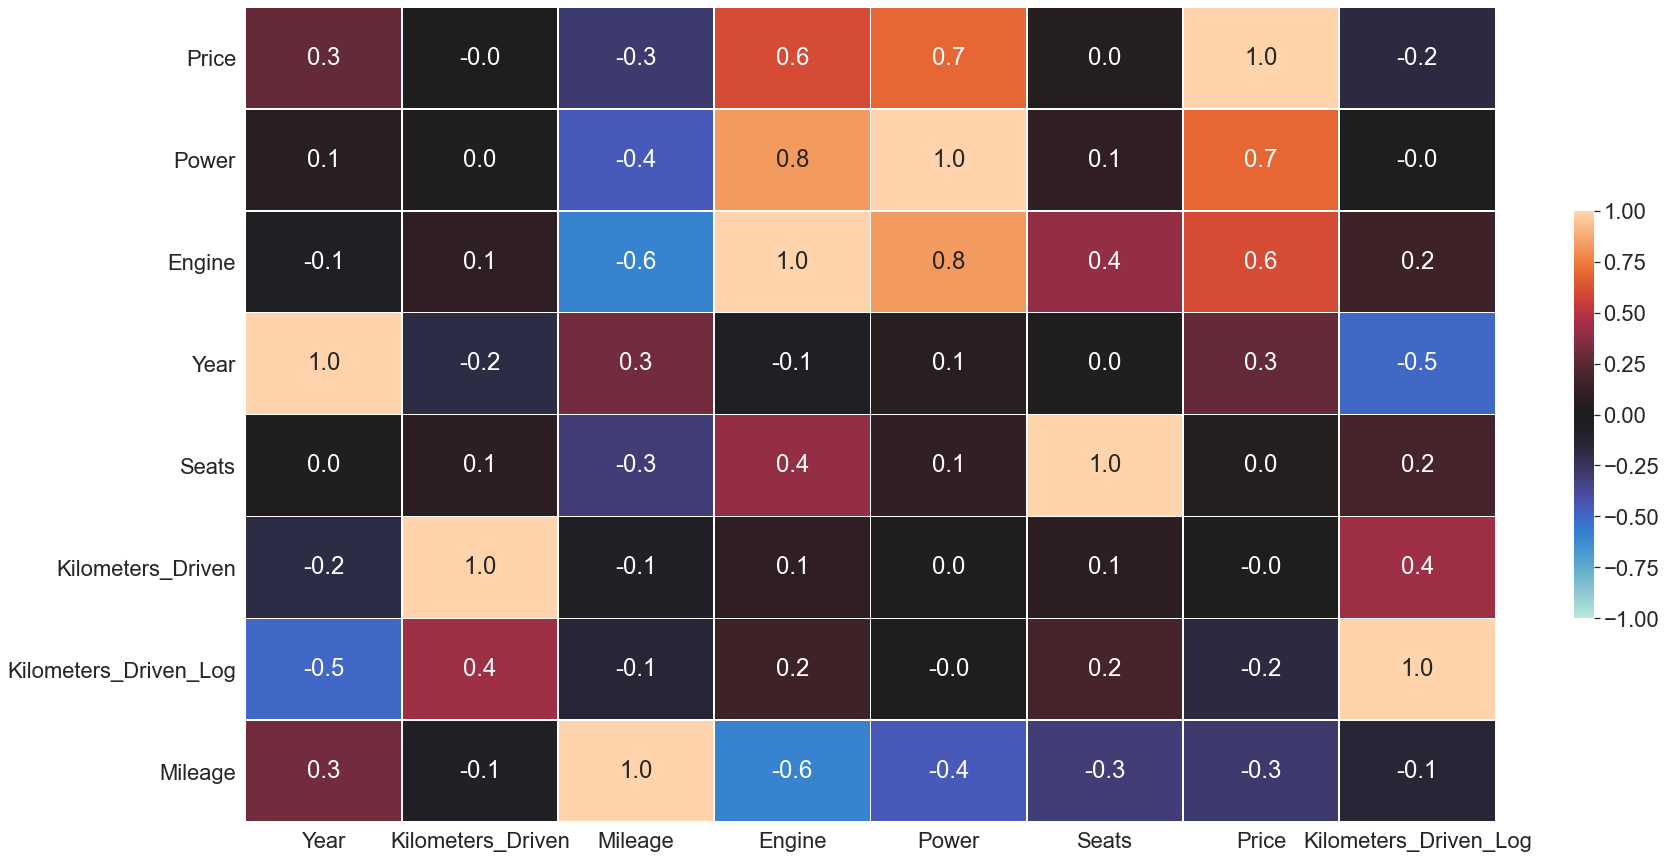

In [80]:


# correlation matrix
# cite reference:  leveraging a code snipet from the Life Expectancy Use Case

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column 
corr = df[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations with respect to Price 

#cmaps['Perceptually Uniform Sequential'] = [
#            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

#cmaps['Sequential'] = [
#            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='icefire', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

# Observations

Before the transformation of Kilometers_Driven_Log was completed, the Price to Kilometers_Driven had no correlation.  We are now able to see a mild, negative correlation.  This is intuitive that as Kilometers_Driven_Log goes up, Price will go down.  The car has more wear and tear, the value goes down.


As expected, other independent variables correlation have generally improved in comparison with the Log transformed variable...specifically :  Engine improved by (0.1), Year's improved by (10.3), Seats improved by (0.2), Mileage is consistent.

Will it look better after outlier treatment?

# Min-Max Scaling for Engine

Will bring it on scale with other variables


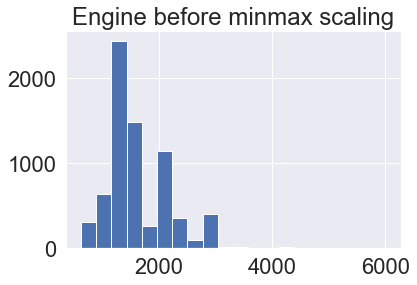

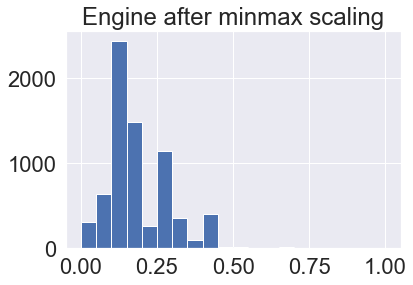

In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# exploring a min-max scaling on Engine
df['Engine'].hist(bins=20)
plt.title('Engine before minmax scaling')
plt.show()

df[['Engine_min_max_scaled']] = MinMaxScaler().fit_transform(
   df[['Engine']])

df['Engine_min_max_scaled'].hist(bins=20)
plt.title('Engine after minmax scaling')
plt.show()


# exploring a min-max scaling on Power
#df['Power'].hist(bins=20)
#plt.title('Power before minmax scaling')
#plt.show()

#df[['Power_min_max_scaled']] = MinMaxScaler().fit_transform(
#    df[['Power']]
#)

#df['Power'].hist(bins=20)
#plt.title('Power after minmax scaling')
#plt.show()
   


In [82]:
df.describe().T 

count          mean           std          min  \
Year                   7205.0   2013.388758      3.237501  1996.000000   
Kilometers_Driven      7205.0  58636.716447  84660.674277   171.000000   
Mileage                7205.0     18.178300      4.513001     0.000000   
Engine                 7205.0   1616.762665    595.085712   624.000000   
Power                  7205.0    110.761719     55.080543     0.000000   
Seats                  7205.0      5.279528      0.811411     0.000000   
Price                  7205.0      8.840215     10.308417     0.440000   
Kilometers_Driven_Log  7205.0     10.759310      0.717290     5.147494   
Engine_min_max_scaled  7205.0      0.184734      0.110734     0.000000   

                                25%           50%           75%           max  
Year                    2011.000000   2014.000000   2016.000000  2.019000e+03  
Kilometers_Driven      34000.000000  53280.000000  73000.000000  6.500000e+06  
Mileage                   15.200000     18.190000     21.100000  3.354000e+01  
Engine                  1198.000000   1493.000000   1968.000000  5.998000e+03  
Power                     74.000000     91.720000    138.030000  6.160000e+02  
Seats                      5.000000      5.000000      5.000000  1.000000e+01  
Price                      3.870000      5.640000      8.400000  1.600000e+02  
Kilometers_Driven_Log     10.434145     10.883335     11.198228  1.568731e+01  
Engine_min_max_scaled      0.106811      0.161705      0.250093  1.000000e+00

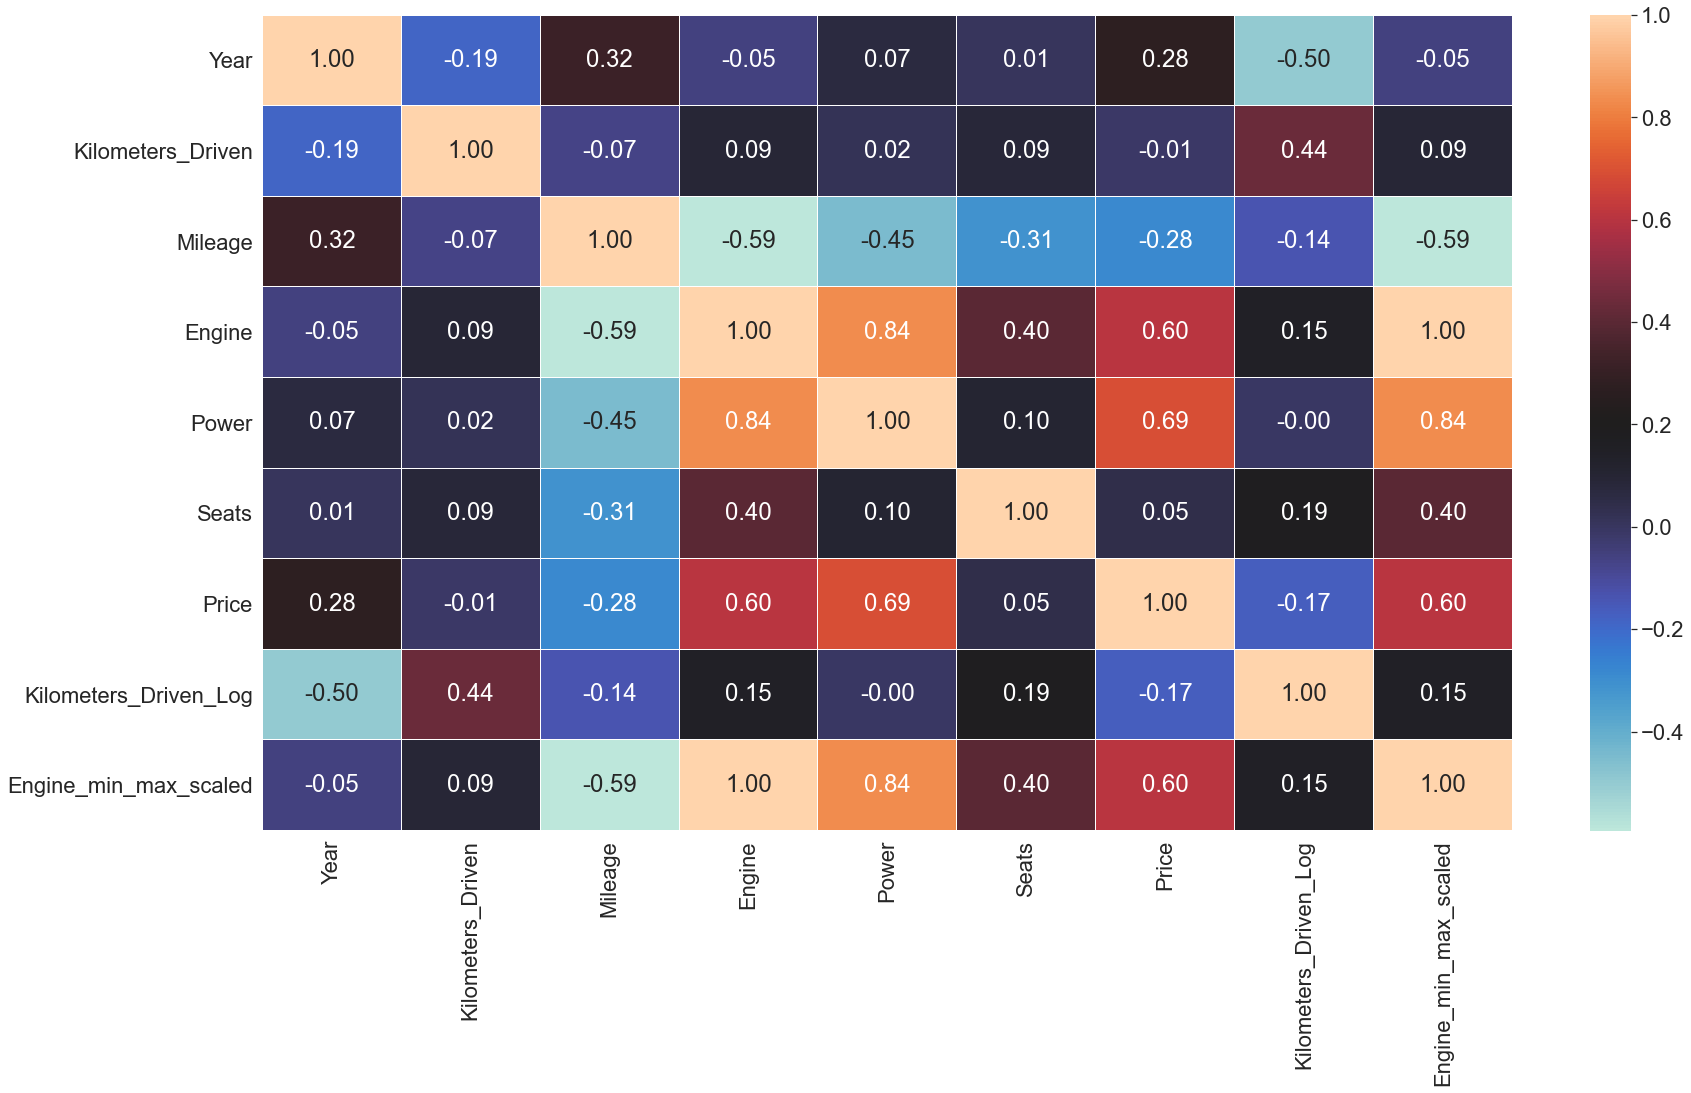

In [83]:
fig,ax = plt.subplots(figsize=(28, 15))   
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="icefire") 
plt.show()

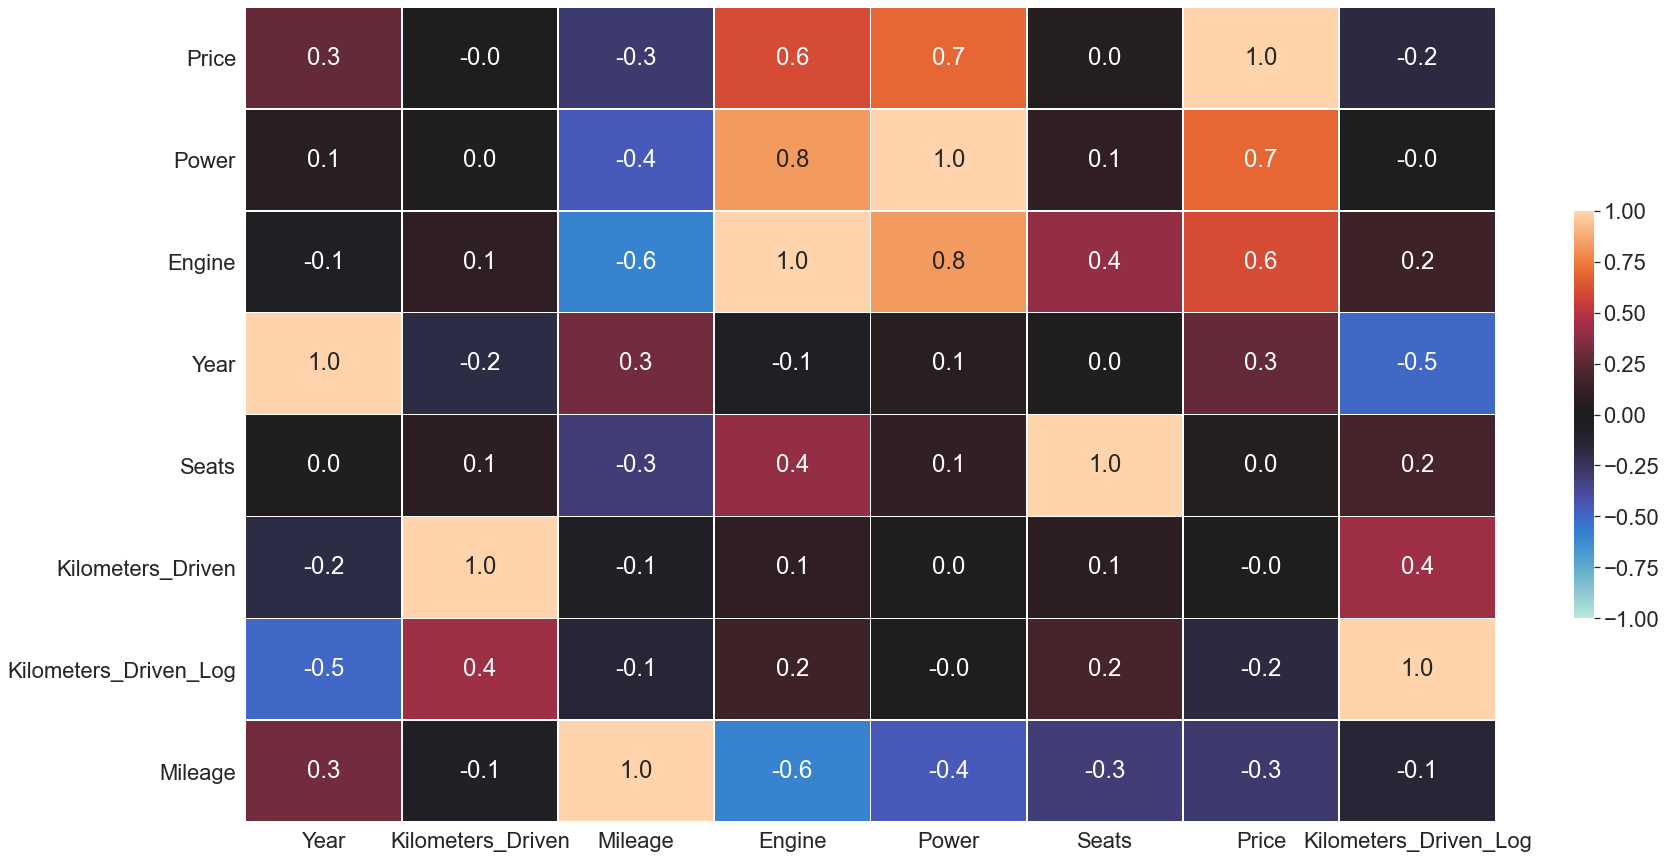

In [84]:
#Cite reference:  from Life Expectancy Case Stdy
corr = df[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations w.r.t Price 


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='icefire', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

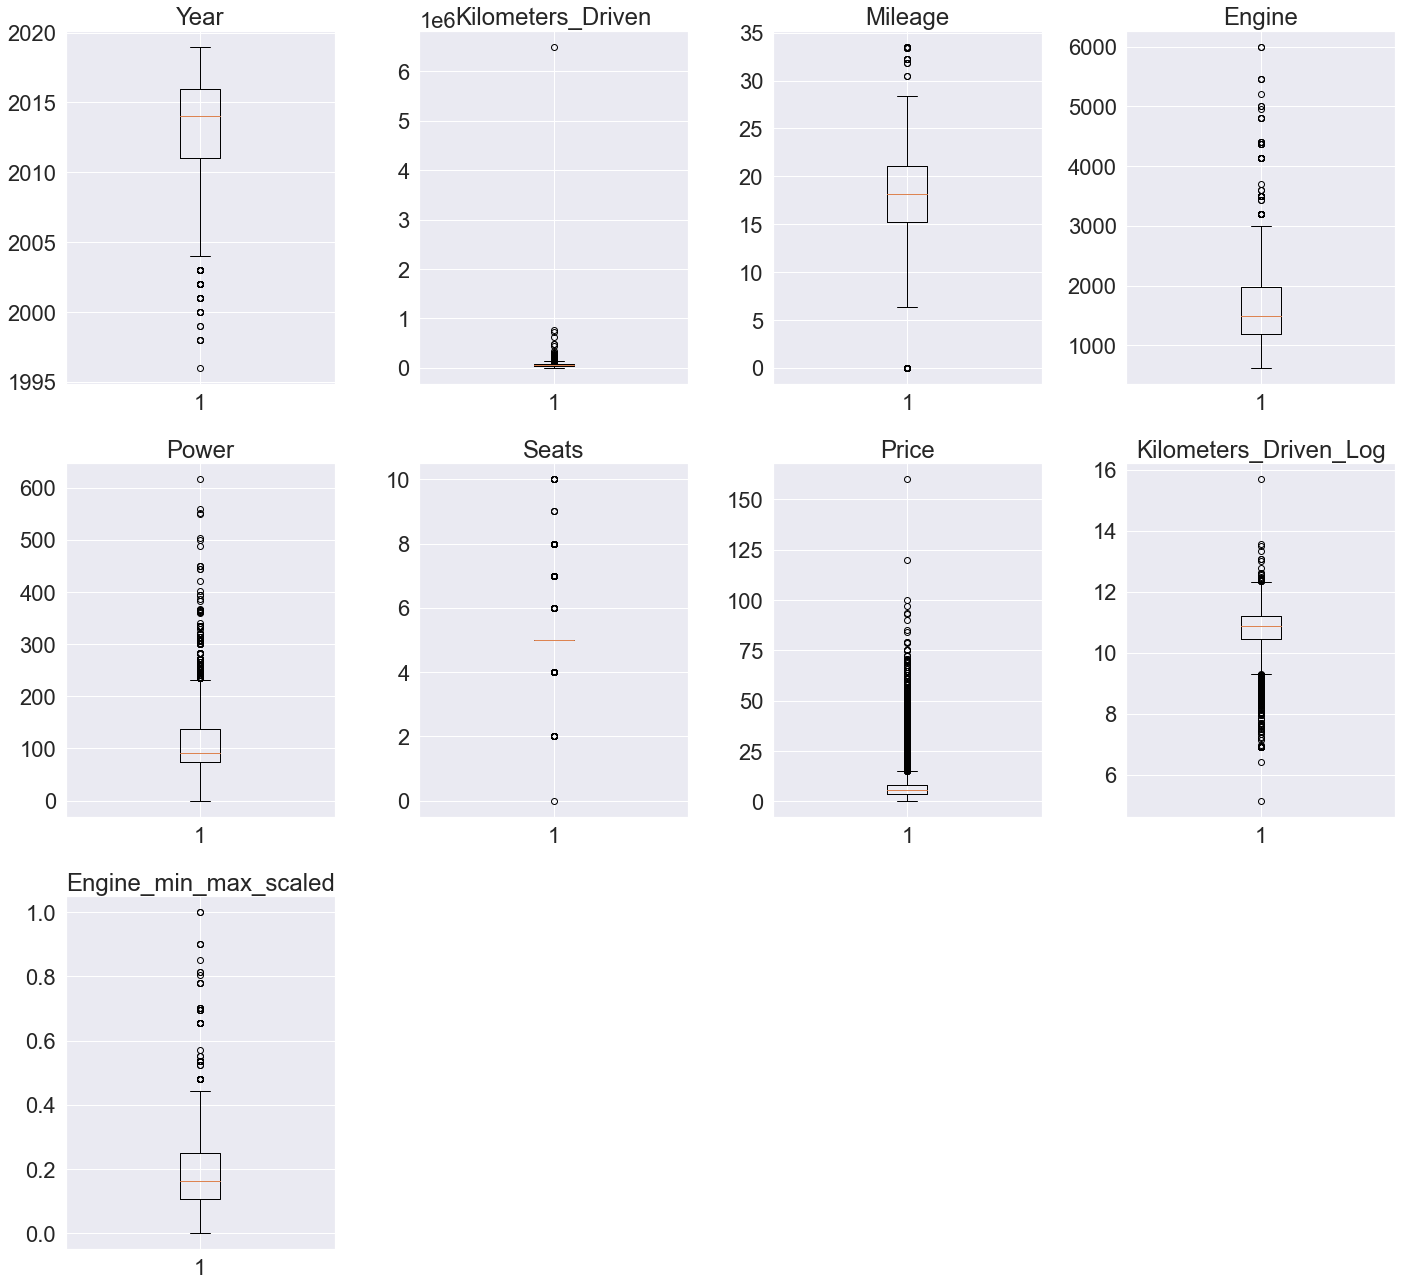

In [85]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove('Year') # dropping year column as it is temporal variable

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Outlier Treatment

In [86]:
# Cite Reference:  Life Expectancy Case Study - code snipet for outlier treatment

#Flooring and capping method for Outlier Treatment

def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [87]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

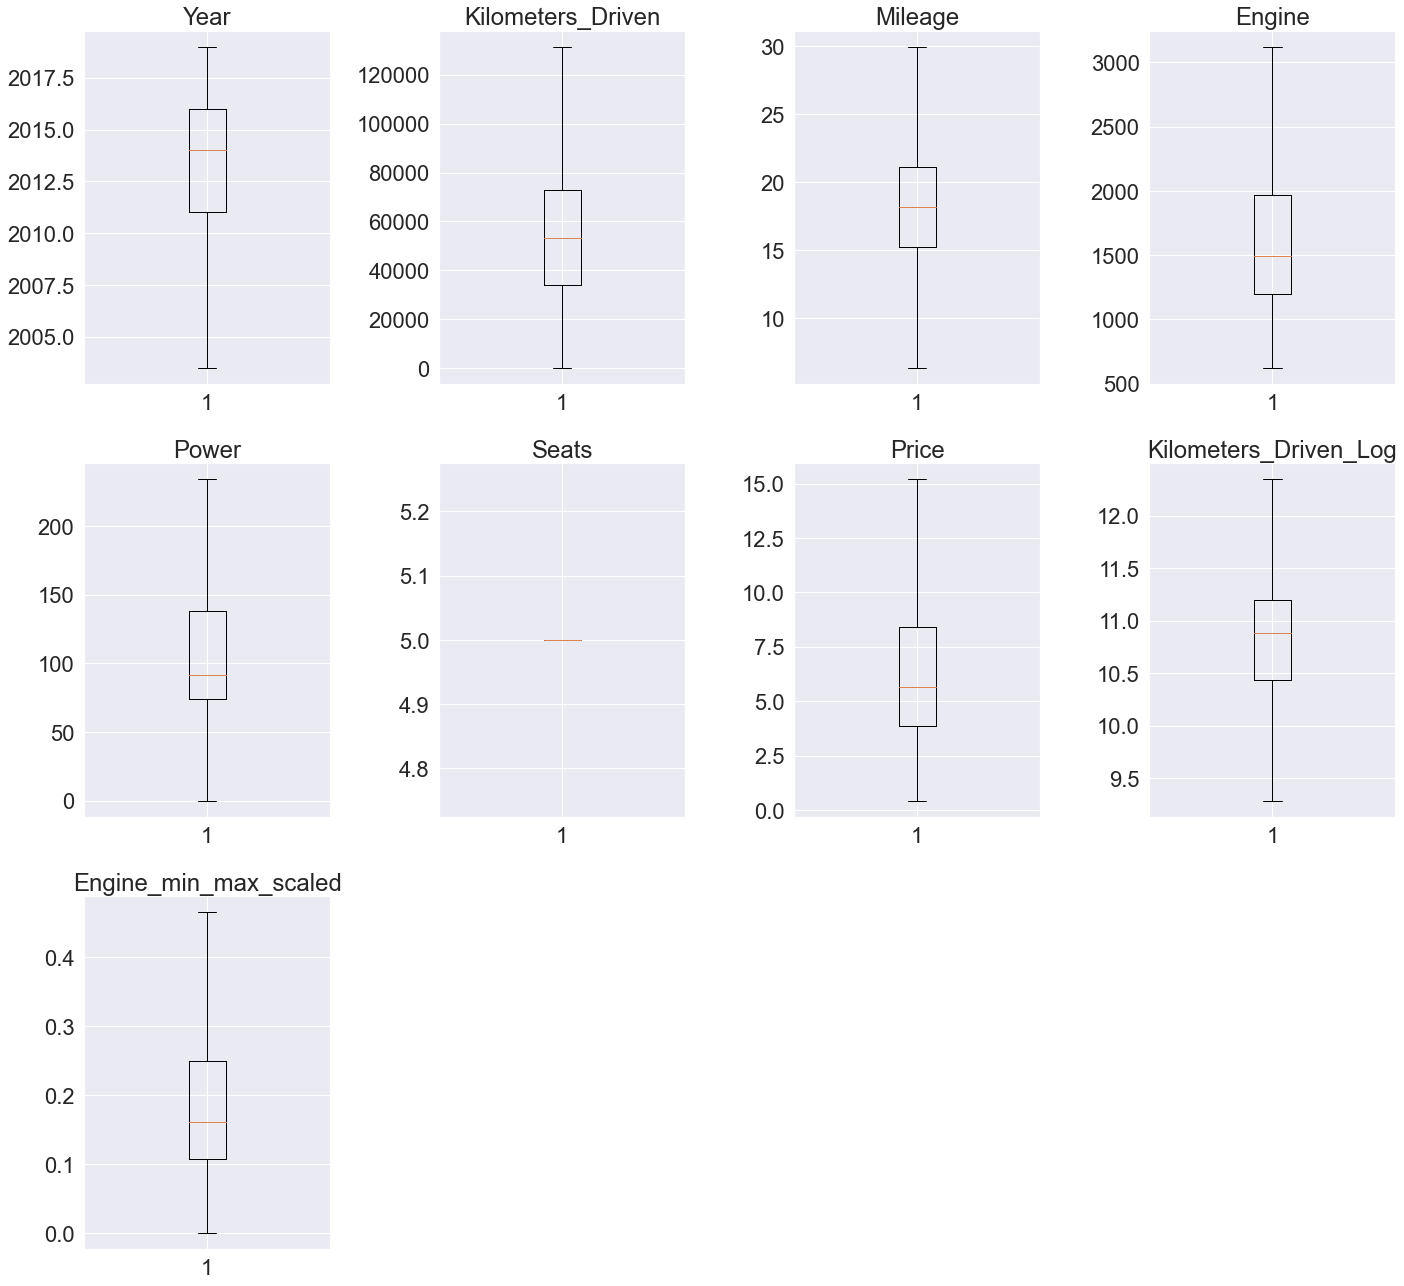

In [88]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Model Building



In [89]:
# Check data

df.head()


Location    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010.0              72000       CNG       Manual      First   
1        Pune  2015.0              41000    Diesel       Manual      First   
2     Chennai  2011.0              46000    Petrol       Manual      First   
3     Chennai  2012.0              87000    Diesel       Manual      First   
4  Coimbatore  2013.0              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats   Price Name_Make Name_Model  \
0    26.60     998   58.16    5.0   1.750    Maruti      Wagon   
1    19.67    1582  126.20    5.0  12.500   Hyundai      Creta   
2    18.20    1199   88.70    5.0   4.500     Honda       Jazz   
3    20.77    1248   88.76    5.0   6.000    Maruti     Ertiga   
4    15.20    1968  140.80    5.0  15.195      Audi         A4   

   Kilometers_Driven_Log  Engine_min_max_scaled  
0              11.184435               0.069594  
1              10.621352               0.178266  
2              10.736418               0.106997  
3              11.373675               0.116115  
4              10.613271               0.250093

In [90]:
#Defining X and y variables
#drop the dependent variable from the X variable, drop original variables and only use the transformed
#versions of Engine and Kilometers_Driven, and drop the Name_Model for now to see if we can get a good
#model performance without it

X = df.drop(['Price','Engine','Kilometers_Driven','Name_Model'], axis=1) #do not add in Name_Model for now
y = df[['Price']]

print(X.head(5))
print(y.head(5))

     Location    Year Fuel_Type Transmission Owner_Type  Mileage   Power  \
0      Mumbai  2010.0       CNG       Manual      First    26.60   58.16   
1        Pune  2015.0    Diesel       Manual      First    19.67  126.20   
2     Chennai  2011.0    Petrol       Manual      First    18.20   88.70   
3     Chennai  2012.0    Diesel       Manual      First    20.77   88.76   
4  Coimbatore  2013.0    Diesel    Automatic     Second    15.20  140.80   

   Seats Name_Make  Kilometers_Driven_Log  Engine_min_max_scaled  
0    5.0    Maruti              11.184435               0.069594  
1    5.0   Hyundai              10.621352               0.178266  
2    5.0     Honda              10.736418               0.106997  
3    5.0    Maruti              11.373675               0.116115  
4    5.0      Audi              10.613271               0.250093  
    Price
0   1.750
1  12.500
2   4.500
3   6.000
4  15.195


In [91]:
print(X.shape)
print(y.shape)

(7205, 11)
(7205, 1)


# Encoding Categorical Variables





In [92]:

x_col_1 = 'Location'
x_col_2 = 'Fuel_Type'
x_col_3 = 'Transmission'
x_col_4 = 'Owner_Type'
#x_col_5 = 'Name_Model' - do not use for now
x_col_6 = 'Name_Make'



X = pd.get_dummies(X, columns=[x_col_1, x_col_2 ,x_col_3 ,x_col_4, x_col_6], drop_first=True)   #x_col_5 do not use for now
X.head()




Year  Mileage   Power  Seats  Kilometers_Driven_Log  \
0  2010.0    26.60   58.16    5.0              11.184435   
1  2015.0    19.67  126.20    5.0              10.621352   
2  2011.0    18.20   88.70    5.0              10.736418   
3  2012.0    20.77   88.76    5.0              11.373675   
4  2013.0    15.20  140.80    5.0              10.613271   

   Engine_min_max_scaled  Location_Bangalore  Location_Chennai  \
0               0.069594                   0                 0   
1               0.178266                   0                 0   
2               0.106997                   0                 1   
3               0.116115                   0                 1   
4               0.250093                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    1               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   
1               0                 0                0              1   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0                 0              0                 0                    1   
1                 1              0                 0                    1   
2                 0              0                 1                    1   
3                 1              0                 0                    1   
4                 1              0                 0                    0   

   Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  \
0                          0                  0                 0   
1                          0                  0                 0   
2                          0                  0                 0   
3                          0                  0                 0   
4                          0                  1                 0   

   Name_Make_Audi  Name_Make_BMW  Name_Make_Bentley  Name_Make_Chevrolet  \
0               0              0                  0                    0   
1               0              0                  0                    0   
2               0              0                  0                    0   
3               0              0                  0                    0   
4               1              0                  0                    0   

   Name_Make_Datsun  Name_Make_Fiat  Name_Make_Force  Name_Make_Ford  \
0                 0               0                0               0   
1                 0               0                0               0   
2                 0               0                0               0   
3                 0               0                0               0   
4                 0               0                0               0   

   Name_Make_Hindustan  Name_Make_Honda  Name_Make_Hyundai  Name_Make_Isuzu  \
0                    0                0                  0                0   
1                    0                0                  1                0   
2                    0                1                  0                0   
3                    0                0                  0                0   
4                    0                0                  0                0   

   Name_Make_Jaguar  Name_Make_Jeep  Name_Make_Lamborghini  \
0                 0               0     

In [93]:
# check to make sure we didn't unknowingly create NaN values in the process

X.isna().sum()

Year                         0
Mileage                      0
Power                        0
Seats                        0
Kilometers_Driven_Log        0
Engine_min_max_scaled        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Name_Make_Audi               0
Name_Make_BMW                0
Name_Make_Bentley            0
Name_Make_Chevrolet          0
Name_Make_Datsun             0
Name_Make_Fiat               0
Name_Make_Force              0
Name_Make_Ford               0
Name_Make_Hindustan          0
Name_Mak

In [94]:
y.isna().sum()

Price    0
dtype: int64

In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       7205 non-null   float64
 1   Mileage                    7205 non-null   float64
 2   Power                      7205 non-null   float64
 3   Seats                      7205 non-null   float64
 4   Kilometers_Driven_Log      7205 non-null   float64
 5   Engine_min_max_scaled      7205 non-null   float64
 6   Location_Bangalore         7205 non-null   uint8  
 7   Location_Chennai           7205 non-null   uint8  
 8   Location_Coimbatore        7205 non-null   uint8  
 9   Location_Delhi             7205 non-null   uint8  
 10  Location_Hyderabad         7205 non-null   uint8  
 11  Location_Jaipur            7205 non-null   uint8  
 12  Location_Kochi             7205 non-null   uint8  
 13  Location_Kolkata           7205 non-null   uint8

In [96]:
X.describe(include='all').T

count         mean        std         min  \
Year                       7205.0  2013.403747   3.183387  2003.50000   
Mileage                    7205.0    18.232427   4.285022     6.35000   
Power                      7205.0   109.010035  48.741080     0.00000   
Seats                      7205.0     5.000000   0.000000     5.00000   
Kilometers_Driven_Log      7205.0    10.783930   0.626130     9.28802   
Engine_min_max_scaled      7205.0     0.183318   0.105170     0.00000   
Location_Bangalore         7205.0     0.059958   0.237426     0.00000   
Location_Chennai           7205.0     0.081610   0.273789     0.00000   
Location_Coimbatore        7205.0     0.106870   0.308970     0.00000   
Location_Delhi             7205.0     0.090909   0.287500     0.00000   
Location_Hyderabad         7205.0     0.121443   0.326665     0.00000   
Location_Jaipur            7205.0     0.068841   0.253201     0.00000   
Location_Kochi             7205.0     0.106593   0.308616     0.00000   
Location_Kolkata           7205.0     0.089938   0.286112     0.00000   
Location_Mumbai            7205.0     0.131020   0.337446     0.00000   
Location_Pune              7205.0     0.104788   0.306302     0.00000   
Fuel_Type_Diesel           7205.0     0.532963   0.498947     0.00000   
Fuel_Type_LPG              7205.0     0.001666   0.040779     0.00000   
Fuel_Type_Petrol           7205.0     0.456766   0.498162     0.00000   
Transmission_Manual        7205.0     0.717418   0.450286     0.00000   
Owner_Type_Fourth & Above  7205.0     0.001527   0.039046     0.00000   
Owner_Type_Second          7205.0     0.157668   0.364455     0.00000   
Owner_Type_Third           7205.0     0.018598   0.135110     0.00000   
Name_Make_Audi             7205.0     0.039556   0.194927     0.00000   
Name_Make_BMW              7205.0     0.042332   0.201359     0.00000   
Name_Make_Bentley          7205.0     0.000278   0.016660     0.00000   
Name_Make_Chevrolet        7205.0     0.020958   0.143253     0.00000   
Name_Make_Datsun           7205.0     0.002359   0.048520     0.00000   
Name_Make_Fiat             7205.0     0.004719   0.068537     0.00000   
Name_Make_Force            7205.0     0.000416   0.020402     0.00000   
Name_Make_Ford             7205.0     0.048716   0.215289     0.00000   
Name_Make_Hindustan        7205.0     0.000139   0.011781     0.00000   
Name_Make_Honda            7205.0     0.102290   0.303050     0.00000   
Name_Make_Hyundai          7205.0     0.184872   0.388220     0.00000   
Name_Make_Isuzu            7205.0     0.000694   0.026336     0.00000   
Name_Make_Jaguar           7205.0     0.006662   0.081355     0.00000   
Name_Make_Jeep             7205.0     0.002637   0.051288     0.00000   
Name_Make_Lamborghini      7205.0     0.000139   0.011781     0.00000   
Name_Make_Land Rover       7205.0     0.008883   0.093835     0.00000   
Name_Make_Mahindra         7205.0     0.045663   0.208767     0.00000   
Name_Make_Maruti           7205.0     0.198612   0.398983     0.00000   
Name_Make_Mercedes-Benz    7205.0     0.052741   0.223532     0.00000   
Name_Make_Mini             7205.0     0.004303   0.065457     0.00000   
Name_Make_Mitsubishi       7205.0     0.004997   0.070514     0.00000   
Name_Make_Nissan           7205.0     0.016239   0.126401     0.00000   
Name_Make_OpelCorsa        7205.0     0.000139   0.011781     0.00000   
Name_Make_Porsche          7205.0     0.002637   0.051288     0.00000   
Name_Make_Renault          7205.0     0.023595   0.151793     0.00000   
Name_Make_Skoda            7205.0     0.027897   0.164690     0.00000   
Name_Make_Smart            7205.0     0.000139   0.011781     0.00000   
Name_Make_Tata             7205.0     0.031645   0.175064     0.00000   
Name_Make_Toyota           7205.0     0.069813   0.254849     0.00000   
Name_Make_Volkswagen       7205.0     0.051908   0.221857     0.00000   
Name_Make_Volvo            7205.0     0.003886   0.062222     0.00000   

            

In [97]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7252
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   7205 non-null   float64
dtypes: float64(1)
memory usage: 432.6 KB


In [98]:
#Splitting the X and Y into TRAIN and TEST sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
X_train.head()

Year  Mileage  Power  Seats  Kilometers_Driven_Log  \
1228  2007.0     13.8  70.00    5.0              10.596660   
142   2016.0     22.0  81.80    5.0              10.440127   
1498  2011.0     19.0  66.10    5.0              11.141876   
6260  2009.0     17.3  57.50    5.0              11.383158   
2683  2017.0     23.1  67.04    5.0              10.181157   

      Engine_min_max_scaled  Location_Bangalore  Location_Chennai  \
1228               0.125605                   0                 1   
142                0.106624                   0                 0   
1498               0.069594                   0                 0   
6260               0.081317                   0                 0   
2683               0.069594                   0                 0   

      Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
1228                    0               0                   0   
142                     0               0                   0   
1498                    0               0                   0   
6260                    0               0                   0   
2683                    0               0                   1   

      Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
1228                0               0                 0                0   
142                 0               1                 0                0   
1498                0               0                 0                0   
6260                1               0                 0                0   
2683                0               0                 0                0   

      Location_Pune  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
1228              0                 0              0                 1   
142               0                 0              0                 1   
1498              1                 0              0                 1   
6260              0                 0              1                 0   
2683              0                 0              0                 1   

      Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
1228                    1                          0                  0   
142                     1                          0                  0   
1498                    1                          0                  1   
6260                    1                          0                  0   
2683                    1                          0                  0   

      Owner_Type_Third  Name_Make_Audi  Name_Make_BMW  Name_Make_Bentley  \
1228                 1               0              0                  0   
142                  0               0              0                  0   
1498                 0               0              0                  0   
6260                 0               0              0                  0   
2683                 0               0              0                  0   

      Name_Make_Chevrolet  Name_Make_Datsun  Name_Make_Fiat  Name_Make_Force  \
1228                    0                 0               0                0   
142                     0                 0               0                0   
1498                    0                 0               0                0   
6260                    0                 0               0                0   
2683                    0                 0               0                0   

      Name_Make_Ford  Name_Make_Hindustan  Name_Make_Honda  Name_Make_Hyundai  \
1228               1                    0                0                  0   
142                0                    0                0                  0   
1498               0                    0                0                  0   
6260               0                    0                0                  0   
2683               0                    0                0                  0   

      Name_Make_Isuzu  Name_Make_Jaguar  Name_Make_

In [100]:
X_train.describe(include='all').T

count         mean        std         min  \
Year                       5043.0  2013.406107   3.212054  2003.50000   
Mileage                    5043.0    18.219593   4.256369     6.35000   
Power                      5043.0   108.798374  48.422902     0.00000   
Seats                      5043.0     5.000000   0.000000     5.00000   
Kilometers_Driven_Log      5043.0    10.785273   0.623698     9.28802   
Engine_min_max_scaled      5043.0     0.182391   0.104455     0.00000   
Location_Bangalore         5043.0     0.058299   0.234331     0.00000   
Location_Chennai           5043.0     0.081896   0.274233     0.00000   
Location_Coimbatore        5043.0     0.106484   0.308487     0.00000   
Location_Delhi             5043.0     0.092009   0.289067     0.00000   
Location_Hyderabad         5043.0     0.120365   0.325420     0.00000   
Location_Jaipur            5043.0     0.067817   0.251456     0.00000   
Location_Kochi             5043.0     0.106683   0.308740     0.00000   
Location_Kolkata           5043.0     0.087051   0.281938     0.00000   
Location_Mumbai            5043.0     0.134245   0.340950     0.00000   
Location_Pune              5043.0     0.105691   0.307472     0.00000   
Fuel_Type_Diesel           5043.0     0.527464   0.499295     0.00000   
Fuel_Type_LPG              5043.0     0.001785   0.042212     0.00000   
Fuel_Type_Petrol           5043.0     0.461432   0.498560     0.00000   
Transmission_Manual        5043.0     0.717034   0.450485     0.00000   
Owner_Type_Fourth & Above  5043.0     0.000793   0.028155     0.00000   
Owner_Type_Second          5043.0     0.161015   0.367581     0.00000   
Owner_Type_Third           5043.0     0.018640   0.135262     0.00000   
Name_Make_Audi             5043.0     0.040650   0.197499     0.00000   
Name_Make_BMW              5043.0     0.040254   0.196573     0.00000   
Name_Make_Bentley          5043.0     0.000397   0.019913     0.00000   
Name_Make_Chevrolet        5043.0     0.019036   0.136666     0.00000   
Name_Make_Datsun           5043.0     0.001785   0.042212     0.00000   
Name_Make_Fiat             5043.0     0.004759   0.068829     0.00000   
Name_Make_Force            5043.0     0.000397   0.019913     0.00000   
Name_Make_Ford             5043.0     0.048186   0.214179     0.00000   
Name_Make_Hindustan        5043.0     0.000000   0.000000     0.00000   
Name_Make_Honda            5043.0     0.104501   0.305940     0.00000   
Name_Make_Hyundai          5043.0     0.185207   0.388504     0.00000   
Name_Make_Isuzu            5043.0     0.000793   0.028155     0.00000   
Name_Make_Jaguar           5043.0     0.006345   0.079413     0.00000   
Name_Make_Jeep             5043.0     0.003371   0.057968     0.00000   
Name_Make_Lamborghini      5043.0     0.000198   0.014082     0.00000   
Name_Make_Land Rover       5043.0     0.009518   0.097105     0.00000   
Name_Make_Mahindra         5043.0     0.044220   0.205603     0.00000   
Name_Make_Maruti           5043.0     0.198890   0.399204     0.00000   
Name_Make_Mercedes-Benz    5043.0     0.054531   0.227085     0.00000   
Name_Make_Mini             5043.0     0.004561   0.067386     0.00000   
Name_Make_Mitsubishi       5043.0     0.005949   0.076907     0.00000   
Name_Make_Nissan           5043.0     0.017450   0.130954     0.00000   
Name_Make_OpelCorsa        5043.0     0.000198   0.014082     0.00000   
Name_Make_Porsche          5043.0     0.002181   0.046657     0.00000   
Name_Make_Renault          5043.0     0.024589   0.154883     0.00000   
Name_Make_Skoda            5043.0     0.029546   0.169348     0.00000   
Name_Make_Smart            5043.0     0.000000   0.000000     0.00000   
Name_Make_Tata             5043.0     0.030736   0.172618     0.00000   
Name_Make_Toyota           5043.0     0.067024   0.250088     0.00000   
Name_Make_Volkswagen       5043.0     0.051358   0.220749     0.00000   
Name_Make_Volvo            5043.0     0.003173   0.056243     0.00000   

            

In [101]:
X_test.info()
X_test.describe (include ='all').T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 3273 to 566
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2162 non-null   float64
 1   Mileage                    2162 non-null   float64
 2   Power                      2162 non-null   float64
 3   Seats                      2162 non-null   float64
 4   Kilometers_Driven_Log      2162 non-null   float64
 5   Engine_min_max_scaled      2162 non-null   float64
 6   Location_Bangalore         2162 non-null   uint8  
 7   Location_Chennai           2162 non-null   uint8  
 8   Location_Coimbatore        2162 non-null   uint8  
 9   Location_Delhi             2162 non-null   uint8  
 10  Location_Hyderabad         2162 non-null   uint8  
 11  Location_Jaipur            2162 non-null   uint8  
 12  Location_Kochi             2162 non-null   uint8  
 13  Location_Kolkata           2162 non-null   uin

count         mean        std         min  \
Year                       2162.0  2013.398242   3.116221  2003.50000   
Mileage                    2162.0    18.262364   4.351971     6.35000   
Power                      2162.0   109.503747  49.483079     0.00000   
Seats                      2162.0     5.000000   0.000000     5.00000   
Kilometers_Driven_Log      2162.0    10.780799   0.631901     9.28802   
Engine_min_max_scaled      2162.0     0.185478   0.106813     0.00000   
Location_Bangalore         2162.0     0.063830   0.244506     0.00000   
Location_Chennai           2162.0     0.080944   0.272812     0.00000   
Location_Coimbatore        2162.0     0.107771   0.310162     0.00000   
Location_Delhi             2162.0     0.088344   0.283860     0.00000   
Location_Hyderabad         2162.0     0.123959   0.329611     0.00000   
Location_Jaipur            2162.0     0.071230   0.257269     0.00000   
Location_Kochi             2162.0     0.106383   0.308398     0.00000   
Location_Kolkata           2162.0     0.096670   0.295576     0.00000   
Location_Mumbai            2162.0     0.123497   0.329083     0.00000   
Location_Pune              2162.0     0.102683   0.303614     0.00000   
Fuel_Type_Diesel           2162.0     0.545791   0.498014     0.00000   
Fuel_Type_LPG              2162.0     0.001388   0.037233     0.00000   
Fuel_Type_Petrol           2162.0     0.445883   0.497178     0.00000   
Transmission_Manual        2162.0     0.718316   0.449924     0.00000   
Owner_Type_Fourth & Above  2162.0     0.003238   0.056822     0.00000   
Owner_Type_Second          2162.0     0.149861   0.357018     0.00000   
Owner_Type_Third           2162.0     0.018501   0.134787     0.00000   
Name_Make_Audi             2162.0     0.037003   0.188812     0.00000   
Name_Make_BMW              2162.0     0.047179   0.212070     0.00000   
Name_Make_Bentley          2162.0     0.000000   0.000000     0.00000   
Name_Make_Chevrolet        2162.0     0.025439   0.157492     0.00000   
Name_Make_Datsun           2162.0     0.003700   0.060731     0.00000   
Name_Make_Fiat             2162.0     0.004625   0.067868     0.00000   
Name_Make_Force            2162.0     0.000463   0.021507     0.00000   
Name_Make_Ford             2162.0     0.049954   0.217900     0.00000   
Name_Make_Hindustan        2162.0     0.000463   0.021507     0.00000   
Name_Make_Honda            2162.0     0.097132   0.296206     0.00000   
Name_Make_Hyundai          2162.0     0.184089   0.387646     0.00000   
Name_Make_Isuzu            2162.0     0.000463   0.021507     0.00000   
Name_Make_Jaguar           2162.0     0.007401   0.085727     0.00000   
Name_Make_Jeep             2162.0     0.000925   0.030408     0.00000   
Name_Make_Lamborghini      2162.0     0.000000   0.000000     0.00000   
Name_Make_Land Rover       2162.0     0.007401   0.085727     0.00000   
Name_Make_Mahindra         2162.0     0.049029   0.215978     0.00000   
Name_Make_Maruti           2162.0     0.197965   0.398558     0.00000   
Name_Make_Mercedes-Benz    2162.0     0.048566   0.215009     0.00000   
Name_Make_Mini             2162.0     0.003700   0.060731     0.00000   
Name_Make_Mitsubishi       2162.0     0.002775   0.052619     0.00000   
Name_Make_Nissan           2162.0     0.013414   0.115064     0.00000   
Name_Make_OpelCorsa        2162.0     0.000000   0.000000     0.00000   
Name_Make_Porsche          2162.0     0.003700   0.060731     0.00000   
Name_Make_Renault          2162.0     0.021277   0.144338     0.00000   
Name_Make_Skoda            2162.0     0.024052   0.153245     0.00000   
Name_Make_Smart            2162.0     0.000463   0.021507     0.00000   
Name_Make_Tata             2162.0     0.033765   0.180666     0.00000   
Name_Make_Toyota           2162.0     0.076318   0.265568     0.00000   
Name_Make_Volkswagen       2162.0     0.053191   0.224467     0.00000   
Name_Make_Volvo            2162.0     0.005550   0.074311     0.00000   

            

In [102]:
X_test.isnull().sum()

Year                         0
Mileage                      0
Power                        0
Seats                        0
Kilometers_Driven_Log        0
Engine_min_max_scaled        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Name_Make_Audi               0
Name_Make_BMW                0
Name_Make_Bentley            0
Name_Make_Chevrolet          0
Name_Make_Datsun             0
Name_Make_Fiat               0
Name_Make_Force              0
Name_Make_Ford               0
Name_Make_Hindustan          0
Name_Mak

In [103]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 1228 to 864
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5043 non-null   float64
dtypes: float64(1)
memory usage: 78.8 KB


In [104]:
y_train.isnull().sum()


Price    0
dtype: int64

In [105]:
y_train.describe (include ='all').T

count      mean       std   min   25%   50%   75%     max
Price  5043.0  6.818155  4.194711  0.44  3.86  5.64  8.35  15.195

In [106]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 3273 to 566
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2162 non-null   float64
dtypes: float64(1)
memory usage: 33.8 KB


In [107]:
y_test.isnull().sum()

Price    0
dtype: int64

In [108]:
y_test.describe (include='all').T

count      mean      std   min   25%   50%  75%     max
Price  2162.0  6.912007  4.22018  0.45  3.87  5.64  8.5  15.195

# Selecting the MODEL + TRAINING + TESTING

In [109]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)    

Intercept of the linear equation: [-849.91179503]

COefficients of the equation are: [[ 4.26793308e-01 -1.08786685e-01  1.90356881e-02  1.39666056e-13
  -3.34848848e-01  6.15376410e+00  2.45081257e-01 -3.63351039e-02
   1.45149172e-01 -4.63162004e-01  1.36944596e-01 -2.37382286e-01
  -1.55585057e-01 -1.07125853e+00 -3.07544410e-01 -1.70653968e-01
   1.11287372e+00  2.33350912e-01 -1.03152594e-01 -8.38192891e-01
   3.74363156e-01 -2.06453471e-01 -5.50377571e-01  2.41731113e+00
   2.42392735e+00  1.01291080e+00 -1.45272186e+00 -1.62351596e+00
  -9.83726870e-01  1.61750628e+00 -6.92725691e-01  5.99520433e-15
  -4.87033099e-01 -2.19883623e-01 -4.32596961e-01  1.64597419e+00
   2.34746497e+00  4.43107985e+00  3.09247071e+00 -6.08825431e-01
  -1.63640548e-01  2.19084665e+00  3.82845814e+00 -6.25033093e-01
  -8.72610963e-01  3.45869256e+00  2.22237136e+00 -6.29507464e-01
  -1.61837302e-01 -9.99200722e-16 -1.71972714e+00  1.10079886e+00
  -8.44166099e-01  1.39891542e+00]]


In [110]:
# Mean Absolute Error on test
MAE = mean_absolute_error(y_test, pred)

In [111]:
# RMSE on test data

RMSE = mean_squared_error(y_test, pred)**0.5

In [112]:
# R2 Squared: on test

R2Score = r2_score(y_test, pred)

In [113]:
print ('Mean Absolute Error (MAE) =', MAE)
print ('Root Mean Square Error (RMSE) =', RMSE)
print ('R2 Score=', R2Score)

Mean Absolute Error (MAE) = 1.5425406760196378
Root Mean Square Error (RMSE) = 2.1767404209572456
R2 Score= 0.7338341483240558


#  First pass model with Name_Make only

Mean Absolute Error (MAE) = 1.5425406760196378

Root Mean Square Error (RMSE) = 2.1767404209572456

R2 Score= 0.7338341483240558




# Tests of Residuals


These tests will look at if the assumptions of the model is suported

Mean of residuals = 0
Linearity of variables
Normality of error terms
No Heteroscedacity




# Ordinary Least Squares (OLS) Method using statsmodel

In [114]:
#Linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     258.1
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:42:24   Log-Likelihood:                -11130.
No. Observations:                5043   AIC:                         2.236e+04
Df Residuals:                    4991   BIC:                         2.270e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

# Observation

p-values < 0.05 (significance level = 0.05) indicate significant variables

next step, test multicolinearity and then address p-values



In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Year                              2.299053
Mileage                           3.528511
Power                             6.364799
Seats                        942981.807041
Kilometers_Driven_Log             1.921472
Engine_min_max_scaled             8.639516
Location_Bangalore                2.461510
Location_Chennai                  2.950476
Location_Coimbatore               3.506283
Location_Delhi                    3.107294
Location_Hyderabad                3.727368
Location_Jaipur                   2.661770
Location_Kochi                    3.496249
Location_Kolkata                  3.129168
Location_Mumbai                   3.954370
Location_Pune                     3.423439
Fuel_Type_Diesel                 30.906591
Fuel_Type_LPG                     1.211716
Fuel_Type_Petrol                 31.550000
Transmission_Manual               2.281973
Owner_Type_Fourth & Above         1.016349
Owner_Type_Second                 1.175664
Owner_Type_Third   

# Remove multicolinearity


1. Drop columns with VIF scores greater than 5, one by one.
2. Review adjusted R Square for each model
3. Drop the variable that contributes the least improvement to the adjusted -R square
4. Check VIF score as you go and follow this proces until all variables are under 5



Will drop the variable with the highest VIF score first.

Seats                        942981.807041




In [116]:
# dropping the highest VIF value and checking the adjusted-R squared  :  Seats

X_train2 = X_train1.drop('Seats', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                         5644.881205
Mileage                        64.144860
Power                          35.903314
Kilometers_Driven_Log         423.772178
Engine_min_max_scaled          34.102132
Location_Bangalore              2.520825
Location_Chennai                3.144807
Location_Coimbatore             3.751988
Location_Delhi                  3.361112
Location_Hyderabad              4.110565
Location_Jaipur                 2.776760
Location_Kochi                  3.759447
Location_Kolkata                3.269022
Location_Mumbai                 4.510146
Location_Pune                   3.748190
Fuel_Type_Diesel               61.050153
Fuel_Type_LPG                   1.213545
Fuel_Type_Petrol               54.963838
Transmission_Manual             8.064071
Owner_Type_Fourth & Above       1.009230
Owner_Type_Second               1.343134
Owner_Type_Third                1.109817
Name_Make_Audi                209.226418
Name_Make_BMW         

In [117]:
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              1021.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:42:25   Log-Likelihood:                         -11502.
No. Observations:                5043   AIC:                                  2.311e+04
Df Residuals:                    4992   BIC:                                  2.344e+04
Df Model:                          51                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Observation 

By eliminating SEATS as a variable, the adjusted Rsquared increated to 0.912 from 0.722.  This is a significant improvement.  This version explains 91.2% of the variance between the model and unseen data.


Will drop the next variable with the VIF score first.

Year                         5644.881205




In [121]:
# dropping the highest VIF value and checking the adjusted-R squared  :  Seats

X_train3 = X_train2.drop('Year', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Mileage                       62.145138
Power                         35.884501
Kilometers_Driven_Log        400.733731
Engine_min_max_scaled         33.980149
Location_Bangalore             2.514701
Location_Chennai               3.136574
Location_Coimbatore            3.731375
Location_Delhi                 3.351203
Location_Hyderabad             4.105353
Location_Jaipur                2.774403
Location_Kochi                 3.740961
Location_Kolkata               3.256475
Location_Mumbai                4.483731
Location_Pune                  3.743916
Fuel_Type_Diesel              59.854935
Fuel_Type_LPG                  1.207849
Fuel_Type_Petrol              53.314608
Transmission_Manual            8.063900
Owner_Type_Fourth & Above      1.009156
Owner_Type_Second              1.340068
Owner_Type_Third               1.105517
Name_Make_Audi                28.802008
Name_Make_BMW                 29.495397
Name_Make_Bentley              1.295669
Name_

In [123]:
olsmod3 = sm.OLS(y_train, X_train3)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              1025.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:50:38   Log-Likelihood:                         -11539.
No. Observations:                5043   AIC:                                  2.318e+04
Df Residuals:                    4993   BIC:                                  2.350e+04
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# Observation

After dropping the next highest VIF Score (Year), the adjusted R-squared did not improve. In fact, it dropped by 0.02.

Stopping here.  We will move forward with model :  olsmod2

The model now has no Multicolinearity.








#  Testing significance of variables using p-values

Will step through p-values in the same fashion as VIF scores, dropping variables one at a time with the highest p-values

Name_Make_Lamborghini       p-value=  0.972 

In [124]:
X_train4 = X_train3.drop(['Name_Make_Lamborghini'], axis=1)

In [125]:
olsmod4 = sm.OLS(y_train, X_train4)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1033.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:08:22   Log-Likelihood:                         -11568.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    4994   BIC:                                  2.355e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [126]:
# dropping the next highest p-value
# Location_Pune   p-value = 0.916

X_train5 = X_train4.drop(['Location_Pune'], axis=1)

In [127]:
olsmod5 = sm.OLS(y_train, X_train5)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1055.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:14:02   Log-Likelihood:                         -11568.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    4995   BIC:                                  2.354e+04
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [128]:
# dropping the next highest p-value
# Location_Jaipur   p-value = 0.768

X_train6 = X_train5.drop(['Location_Jaipur'], axis=1)


In [129]:
olsmod6 = sm.OLS(y_train, X_train6)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1078.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:17:17   Log-Likelihood:                         -11568.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    4996   BIC:                                  2.354e+04
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [130]:
# dropping the next highest p-value
# Location_Chennai   p-value = 0.774


X_train7 = X_train6.drop(['Location_Chennai'], axis=1)

In [131]:
olsmod7 = sm.OLS(y_train, X_train7)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1101.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:20:23   Log-Likelihood:                         -11568.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    4997   BIC:                                  2.353e+04
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [132]:
#Name_Make_Smart            p-value = 0.938


X_train8 = X_train7.drop(['Name_Make_Smart'], axis=1)

In [133]:
olsmod8 = sm.OLS(y_train, X_train8)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1101.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:22:48   Log-Likelihood:                         -11568.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    4997   BIC:                                  2.353e+04
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [134]:
#Fuel_Type_LPG                p-value = 0.757   

X_train9 = X_train8.drop(['Fuel_Type_LPG'], axis=1)


In [135]:
olsmod9 = sm.OLS(y_train, X_train9)
olsres9 = olsmod9.fit()
print(olsres9.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1126.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:25:07   Log-Likelihood:                         -11568.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    4998   BIC:                                  2.352e+04
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [136]:
# Owner_Type_Fourth & Above  p-value = 0.286 

X_train10 = X_train9.drop(['Owner_Type_Fourth & Above'], axis=1)

In [137]:
olsmod10 = sm.OLS(y_train, X_train10)
olsres10 = olsmod10.fit()
print(olsres10.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1151.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:27:20   Log-Likelihood:                         -11568.
No. Observations:                5043   AIC:                                  2.322e+04
Df Residuals:                    4999   BIC:                                  2.351e+04
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [138]:
# Location_Delhi      p-value = 0.170 

X_train11 = X_train10.drop(['Location_Delhi'], axis=1)

In [139]:
olsmod11 = sm.OLS(y_train, X_train11)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1178.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:29:57   Log-Likelihood:                         -11569.
No. Observations:                5043   AIC:                                  2.322e+04
Df Residuals:                    5000   BIC:                                  2.351e+04
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [140]:
# Location_Mumbai            p= 0.173  

X_train12 = X_train11.drop(['Location_Mumbai'], axis=1)

In [141]:
olsmod12 = sm.OLS(y_train, X_train12)
olsres12 = olsmod12.fit()
print(olsres12.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1206.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:31:46   Log-Likelihood:                         -11570.
No. Observations:                5043   AIC:                                  2.322e+04
Df Residuals:                    5001   BIC:                                  2.350e+04
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [143]:
# Fuel_Type_Petrol     p-value =  0.052   

X_train13 = X_train12.drop(['Fuel_Type_Petrol'], axis=1)

In [144]:
olsmod13 = sm.OLS(y_train, X_train13)
olsres13 = olsmod13.fit()
print(olsres13.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1234.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:35:04   Log-Likelihood:                         -11572.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    5002   BIC:                                  2.349e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# all p-values < 0.05 - selecting model: olsmod13 in X_train13

Adj. R-squared (uncentered):              0.909

The model's adjusted R-Squared droped by 0.003.  The variables we dropped were not significant.


# Test other assumptions on model: olsmod13

1. Mean of residuals =  0
2. Linearity of variables
3. Normality of error terms
3. No Heteroscedacity


# 1. Mean of Residuals

In [156]:
Residuals = olsres13.resid.mean()
print ('The Mean of the Residuals =', Residuals)

The Mean of the Residuals = 0.006009638589211057


# Observation

The Mean of the Residuals is equal to very close to zero so the assumption is satisfied.



# 2. Linearity of Variables Requirement

In [157]:
residuals2 = olsres13.resid
fitted = olsres13.fittedvalues #predicted values

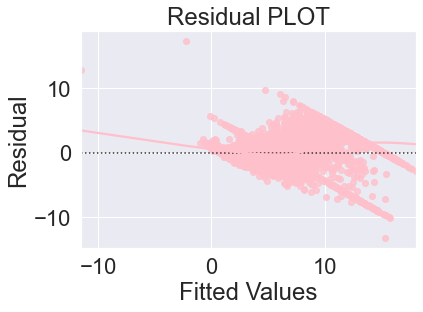

In [161]:
sns.set_style("darkgrid")
sns.residplot(fitted,residuals2,color="pink",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

# Observation

There is no pattern in the fitted value versus residual so the assumption of linearity is upheld.



# 3. Test for Normality

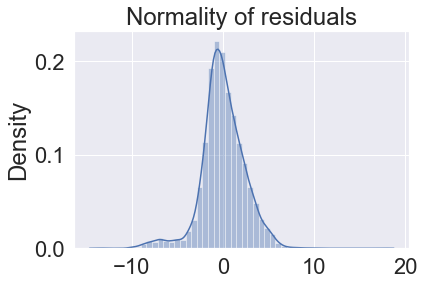

In [162]:
sns.distplot(residuals2)
plt.title('Normality of residuals')
plt.show()

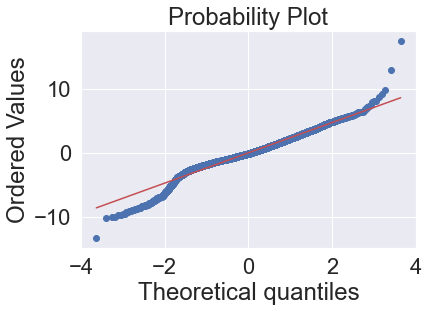

In [163]:
import pylab
import scipy.stats as stats
stats.probplot(residuals,dist="norm",plot=pylab)
plt.show()

In [164]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.962639331817627, pvalue=3.295145534636296e-34)

# Observation

Shapiro Test indicates non-normality,  the QQ plot shows a linear relationship in residuals.

Given the Shapiro Test breaks down with large data sets, we will lean to the QQ plot.


# 4. Test for Heteroscedasticity



In [165]:

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train13)
lzip(name, test)

[('F statistic', 1.071107488437392), ('p-value', 0.04355710872891059)]

# Observation


Goldfeldquandt test

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

The p-value is <0.05 therefore we REJECT THE NULL HYPOTHESIS, and we accept the Alternate Hypothesis.

We cannot support the requirement of HOMOSCEDASTICITY in Model: olsmod13

While technically not over the significance level, it is very close.  We should technically continue to work with the model until the p-value exceeds 0.05.

Moving forward to Predictions.



# PREDICTIONS

In [166]:
X_test_final = X_test[X_train13.columns]

In [167]:
X_test_final.head()

Mileage   Power  Kilometers_Driven_Log  Engine_min_max_scaled  \
3273    21.40   83.10              10.452505               0.106624   
1543    22.32  126.30              11.211834               0.178266   
6376    17.01  126.20              10.610833               0.178266   
177     22.54   88.73              10.275086               0.143655   
232     22.07   73.90              10.714440               0.106997   

      Location_Bangalore  Location_Coimbatore  Location_Hyderabad  \
3273                   0                    1                   0   
1543                   0                    0                   0   
6376                   1                    0                   0   
177                    1                    0                   0   
232                    0                    0                   0   

      Location_Kochi  Location_Kolkata  Fuel_Type_Diesel  Transmission_Manual  \
3273               0                 0                 0                    0   
1543               0                 0                 1                    1   
6376               0                 0                 1                    0   
177                0                 0                 1                    1   
232                0                 0                 1                    1   

      Owner_Type_Second  Owner_Type_Third  Name_Make_Audi  Name_Make_BMW  \
3273                  0                 0               0              0   
1543                  1                 0               0              0   
6376                  0                 0               0              0   
177                   0                 0               0              0   
232                   0                 0               0              0   

      Name_Make_Bentley  Name_Make_Chevrolet  Name_Make_Datsun  \
3273                  0                    0                 0   
1543                  0                    0                 0   
6376                  0                    0                 0   
177                   0                    0                 0   
232                   0                    0                 0   

      Name_Make_Fiat  Name_Make_Force  Name_Make_Ford  Name_Make_Hindustan  \
3273               0                0               0                    0   
1543               0                0               0                    0   
6376               0                0               0                    0   
177                0                0               0                    0   
232                0                0               0                    0   

      Name_Make_Honda  Name_Make_Hyundai  Name_Make_Isuzu  Name_Make_Jaguar  \
3273                0                  0                0                 0   
1543                0                  1                0                 0   
6376                0                  1                0                 0   
177                 0                  1                0                 0   
232                 0                  0                0                 0   

      Name_Make_Jeep  Name_Make_Land Rover  Name_Make_Mahindra  \
3273               0                     0                   0   
1543               0                     0                   0   
6376               0                     0                   0   
177                0                     0                   0   
232                0                     0                   0   

      Name_Make_Maruti  Name_Make_Mercedes-Benz  Name_Make_Mini  \
3273                 1                        0               0   
1543                 0                        0               0   
6376                 0                        0               0   
177                  0                        0               0   
232                  0                        0               0   

      Name_Make_Mitsubishi  Name_Make_Nissan  Name_Make_OpelCorsa  \
3273      

In [168]:
y_pred = olsres13.predict(X_test_final)

In [169]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 2.400737467113753
Test error: 2.4074184697425713


# Observation

We have low Test and Train error, errors are effecivelty equal, model does not demonstrate overfitting.

Conclude that Model: olsmod13 is suitaible for prediction and inference



In [170]:
olsmod13 = sm.OLS(y_train, X_train13)
olsres13 = olsmod13.fit()
print(olsres13.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1234.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:11:14   Log-Likelihood:                         -11572.
No. Observations:                5043   AIC:                                  2.323e+04
Df Residuals:                    5002   BIC:                                  2.349e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# Conclusion and Final Observations

Final Model: olsmod13

The model follows all assumptions, however the Homoscedasticity requirement is close but does not technically meet the requirement.  This could lead to issues in model stability.

The adjusted R-squared for this model is 0.909. Therefore it explains 90.9% of the variance when applied on unseen data. 

The Make of the car (e.g., Audi, BMW, Ford, Porsche, etc.) has the strongest impact on the Price. These variables are positively correlated and different in magnitude, with higher end/luxury cars (e.g., Mercedes 15.71) driving the highest impact to change in Price for each specific Make sold. More classically affordable brands such as Tata have lower coefficients (12.175).

The Engine Displacement is the next most positive impact to Price is Engine Size at +5.78. 

The Mileage and Power have a low impact on the Price model for USED Cars, at 0.024 and 0.289, respectively.  Or in short, essentially no real influence.

The Location of where the USED Care is being sold has some contribution ranging from 0.2649 to 1.17, with the latter being in Coimbatore.  However, Kolkata has a negative influece on Price ( - 1.13).  With more research we should explore what contributes the premium and discounted pricing.

Second and Third Owner Type degrade Pricing, -0.79 and -1.52.  A factor of 2X, suggesting that people view the changes in ownership as a reason to expect a lower Price on their USED CAR.

Diesel as Fuel type is more popular as we saw in the EDA based on the % of Diesel vs. Petrol based USED CARs.  The coeff is 1.42.

As we expected from the EDA, Manual Transmission USED CARS have a lower PRICE and the model indicates a negative correlation and a weight of -1.10.


The BUSINESS :  CARS4U can now use these parameters to predict the selling price for any of the Cars, as well as leverage their desired MARGIN profile to establish guidelines for negotiating when they are on the Buying side of the table.




    